In [1]:
from deep_rl import *
import matplotlib.pyplot as plt

/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/network/home/penmetss/DeepRL/deeprl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/network/home/penmetss/DeepRL/deeprl/lib

In [2]:
def dsr_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()
    config.c = 0.1

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: SRNet(config.action_dim, SRIdentityBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DSRAgent(config))
    
# DQN
def dqn_feature(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    config.merge(kwargs)

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(params, 0.001)
    config.network_fn = lambda: VanillaNet(config.action_dim, FCBody(config.state_dim))
    # config.network_fn = lambda: DuelingNet(config.action_dim, FCBody(config.state_dim))
    # config.replay_fn = lambda: Replay(memory_size=int(1e4), batch_size=10)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e4), batch_size=10)

    config.random_action_prob = LinearSchedule(1.0, 0.1, 1e4)
    config.discount = 0.99
    config.target_network_update_freq = 200
    config.exploration_steps = 1000
    # config.double_q = True
    config.double_q = False
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.eval_interval = int(5e3)
    config.max_steps = 1e5
    config.async_actor = False
    run_steps(DQNAgent(config))

In [3]:
mkdir('log')
mkdir('tf_log')
set_one_thread()
random_seed()
select_device(-1)

In [4]:
game = 'FourRooms'
dqn_feature(game=game)

2020-03-01 16:09:35,461 - root - INFO: steps 0, 119837257.14 steps/s
2020-03-01 16:09:35,793 - root - INFO: steps 0, episodic_return_test -200.00(0.00)
2020-03-01 16:09:36,525 - root - INFO: steps 10, episodic_return_train -10
2020-03-01 16:09:36,583 - root - INFO: steps 210, episodic_return_train -200
2020-03-01 16:09:36,633 - root - INFO: steps 410, episodic_return_train -200
2020-03-01 16:09:36,684 - root - INFO: steps 610, episodic_return_train -200
2020-03-01 16:09:36,737 - root - INFO: steps 810, episodic_return_train -200
2020-03-01 16:09:36,740 - root - INFO: steps 819, episodic_return_train -8
2020-03-01 16:09:36,764 - root - INFO: steps 884, episodic_return_train -64
2020-03-01 16:09:36,773 - root - INFO: steps 920, episodic_return_train -35
2020-03-01 16:09:36,793 - root - INFO: steps 1000, 752.15 steps/s
2020-03-01 16:09:36,865 - root - INFO: steps 1041, episodic_return_train -120
2020-03-01 16:09:37,014 - root - INFO: steps 1221, episodic_return_train -179
2020-03-01 16:09

2020-03-01 16:09:44,824 - root - INFO: steps 10149, episodic_return_train -153
2020-03-01 16:09:44,975 - root - INFO: steps 10349, episodic_return_train -200
2020-03-01 16:09:45,130 - root - INFO: steps 10549, episodic_return_train -200
2020-03-01 16:09:45,145 - root - INFO: steps 10564, episodic_return_train -14
2020-03-01 16:09:45,154 - root - INFO: steps 10573, episodic_return_train -8
2020-03-01 16:09:45,252 - root - INFO: steps 10684, episodic_return_train -110
2020-03-01 16:09:45,281 - root - INFO: steps 10716, episodic_return_train -31
2020-03-01 16:09:45,447 - root - INFO: steps 10916, episodic_return_train -200
2020-03-01 16:09:45,517 - root - INFO: steps 11000, 979.64 steps/s
2020-03-01 16:09:45,617 - root - INFO: steps 11116, episodic_return_train -200
2020-03-01 16:09:45,785 - root - INFO: steps 11316, episodic_return_train -200
2020-03-01 16:09:45,792 - root - INFO: steps 11326, episodic_return_train -9
2020-03-01 16:09:45,800 - root - INFO: steps 11334, episodic_return_tr

2020-03-01 16:09:49,415 - root - INFO: steps 15446, episodic_return_train -2
2020-03-01 16:09:49,429 - root - INFO: steps 15461, episodic_return_train -14
2020-03-01 16:09:49,440 - root - INFO: steps 15474, episodic_return_train -12
2020-03-01 16:09:49,448 - root - INFO: steps 15483, episodic_return_train -8
2020-03-01 16:09:49,456 - root - INFO: steps 15490, episodic_return_train -6
2020-03-01 16:09:49,486 - root - INFO: steps 15527, episodic_return_train -36
2020-03-01 16:09:49,494 - root - INFO: steps 15534, episodic_return_train -6
2020-03-01 16:09:49,506 - root - INFO: steps 15544, episodic_return_train -9
2020-03-01 16:09:49,526 - root - INFO: steps 15562, episodic_return_train -17
2020-03-01 16:09:49,544 - root - INFO: steps 15582, episodic_return_train -19
2020-03-01 16:09:49,548 - root - INFO: steps 15587, episodic_return_train -4
2020-03-01 16:09:49,555 - root - INFO: steps 15592, episodic_return_train -4
2020-03-01 16:09:49,611 - root - INFO: steps 15663, episodic_return_tra

2020-03-01 16:09:51,461 - root - INFO: steps 17754, episodic_return_train -15
2020-03-01 16:09:51,474 - root - INFO: steps 17769, episodic_return_train -14
2020-03-01 16:09:51,487 - root - INFO: steps 17777, episodic_return_train -7
2020-03-01 16:09:51,495 - root - INFO: steps 17787, episodic_return_train -9
2020-03-01 16:09:51,519 - root - INFO: steps 17812, episodic_return_train -24
2020-03-01 16:09:51,525 - root - INFO: steps 17818, episodic_return_train -5
2020-03-01 16:09:51,544 - root - INFO: steps 17836, episodic_return_train -17
2020-03-01 16:09:51,549 - root - INFO: steps 17843, episodic_return_train -6
2020-03-01 16:09:51,576 - root - INFO: steps 17868, episodic_return_train -24
2020-03-01 16:09:51,585 - root - INFO: steps 17877, episodic_return_train -8
2020-03-01 16:09:51,586 - root - INFO: steps 17878, episodic_return_train 0
2020-03-01 16:09:51,621 - root - INFO: steps 17914, episodic_return_train -35
2020-03-01 16:09:51,642 - root - INFO: steps 17936, episodic_return_tra

2020-03-01 16:09:53,048 - root - INFO: steps 19398, episodic_return_train -12
2020-03-01 16:09:53,053 - root - INFO: steps 19401, episodic_return_train -2
2020-03-01 16:09:53,074 - root - INFO: steps 19424, episodic_return_train -22
2020-03-01 16:09:53,085 - root - INFO: steps 19436, episodic_return_train -11
2020-03-01 16:09:53,089 - root - INFO: steps 19443, episodic_return_train -6
2020-03-01 16:09:53,094 - root - INFO: steps 19445, episodic_return_train -1
2020-03-01 16:09:53,099 - root - INFO: steps 19448, episodic_return_train -2
2020-03-01 16:09:53,100 - root - INFO: steps 19449, episodic_return_train 0
2020-03-01 16:09:53,104 - root - INFO: steps 19455, episodic_return_train -5
2020-03-01 16:09:53,112 - root - INFO: steps 19461, episodic_return_train -5
2020-03-01 16:09:53,129 - root - INFO: steps 19482, episodic_return_train -20
2020-03-01 16:09:53,164 - root - INFO: steps 19525, episodic_return_train -42
2020-03-01 16:09:53,177 - root - INFO: steps 19537, episodic_return_trai

2020-03-01 16:09:54,589 - root - INFO: steps 20860, episodic_return_train -26
2020-03-01 16:09:54,620 - root - INFO: steps 20899, episodic_return_train -38
2020-03-01 16:09:54,632 - root - INFO: steps 20910, episodic_return_train -10
2020-03-01 16:09:54,643 - root - INFO: steps 20920, episodic_return_train -9
2020-03-01 16:09:54,658 - root - INFO: steps 20939, episodic_return_train -18
2020-03-01 16:09:54,669 - root - INFO: steps 20948, episodic_return_train -8
2020-03-01 16:09:54,678 - root - INFO: steps 20957, episodic_return_train -8
2020-03-01 16:09:54,693 - root - INFO: steps 20969, episodic_return_train -11
2020-03-01 16:09:54,705 - root - INFO: steps 20981, episodic_return_train -11
2020-03-01 16:09:54,706 - root - INFO: steps 20983, episodic_return_train -1
2020-03-01 16:09:54,722 - root - INFO: steps 21000, 917.98 steps/s
2020-03-01 16:09:54,732 - root - INFO: steps 21010, episodic_return_train -26
2020-03-01 16:09:54,744 - root - INFO: steps 21020, episodic_return_train -9
20

2020-03-01 16:09:56,034 - root - INFO: steps 22300, episodic_return_train -18
2020-03-01 16:09:56,051 - root - INFO: steps 22322, episodic_return_train -21
2020-03-01 16:09:56,059 - root - INFO: steps 22331, episodic_return_train -8
2020-03-01 16:09:56,082 - root - INFO: steps 22348, episodic_return_train -16
2020-03-01 16:09:56,102 - root - INFO: steps 22367, episodic_return_train -18
2020-03-01 16:09:56,126 - root - INFO: steps 22385, episodic_return_train -17
2020-03-01 16:09:56,127 - root - INFO: steps 22387, episodic_return_train -1
2020-03-01 16:09:56,137 - root - INFO: steps 22392, episodic_return_train -4
2020-03-01 16:09:56,138 - root - INFO: steps 22393, episodic_return_train 0
2020-03-01 16:09:56,148 - root - INFO: steps 22401, episodic_return_train -7
2020-03-01 16:09:56,174 - root - INFO: steps 22430, episodic_return_train -28
2020-03-01 16:09:56,179 - root - INFO: steps 22435, episodic_return_train -4
2020-03-01 16:09:56,198 - root - INFO: steps 22453, episodic_return_tra

2020-03-01 16:09:57,544 - root - INFO: steps 23878, episodic_return_train -35
2020-03-01 16:09:57,553 - root - INFO: steps 23887, episodic_return_train -8
2020-03-01 16:09:57,572 - root - INFO: steps 23907, episodic_return_train -19
2020-03-01 16:09:57,588 - root - INFO: steps 23922, episodic_return_train -14
2020-03-01 16:09:57,610 - root - INFO: steps 23944, episodic_return_train -21
2020-03-01 16:09:57,624 - root - INFO: steps 23960, episodic_return_train -15
2020-03-01 16:09:57,628 - root - INFO: steps 23966, episodic_return_train -5
2020-03-01 16:09:57,654 - root - INFO: steps 23997, episodic_return_train -30
2020-03-01 16:09:57,660 - root - INFO: steps 24000, 1068.69 steps/s
2020-03-01 16:09:57,668 - root - INFO: steps 24006, episodic_return_train -8
2020-03-01 16:09:57,679 - root - INFO: steps 24016, episodic_return_train -9
2020-03-01 16:09:57,690 - root - INFO: steps 24024, episodic_return_train -7
2020-03-01 16:09:57,699 - root - INFO: steps 24032, episodic_return_train -7
20

2020-03-01 16:09:58,980 - root - INFO: steps 25213, episodic_return_train -5
2020-03-01 16:09:58,989 - root - INFO: steps 25222, episodic_return_train -8
2020-03-01 16:09:59,011 - root - INFO: steps 25246, episodic_return_train -23
2020-03-01 16:09:59,036 - root - INFO: steps 25277, episodic_return_train -30
2020-03-01 16:09:59,041 - root - INFO: steps 25283, episodic_return_train -5
2020-03-01 16:09:59,052 - root - INFO: steps 25293, episodic_return_train -9
2020-03-01 16:09:59,072 - root - INFO: steps 25318, episodic_return_train -24
2020-03-01 16:09:59,080 - root - INFO: steps 25324, episodic_return_train -5
2020-03-01 16:09:59,092 - root - INFO: steps 25335, episodic_return_train -10
2020-03-01 16:09:59,116 - root - INFO: steps 25356, episodic_return_train -20
2020-03-01 16:09:59,123 - root - INFO: steps 25364, episodic_return_train -7
2020-03-01 16:09:59,132 - root - INFO: steps 25374, episodic_return_train -9
2020-03-01 16:09:59,140 - root - INFO: steps 25382, episodic_return_tra

2020-03-01 16:10:00,444 - root - INFO: steps 26704, episodic_return_train -26
2020-03-01 16:10:00,476 - root - INFO: steps 26737, episodic_return_train -32
2020-03-01 16:10:00,486 - root - INFO: steps 26751, episodic_return_train -13
2020-03-01 16:10:00,490 - root - INFO: steps 26754, episodic_return_train -2
2020-03-01 16:10:00,516 - root - INFO: steps 26785, episodic_return_train -30
2020-03-01 16:10:00,527 - root - INFO: steps 26799, episodic_return_train -13
2020-03-01 16:10:00,552 - root - INFO: steps 26816, episodic_return_train -16
2020-03-01 16:10:00,577 - root - INFO: steps 26833, episodic_return_train -16
2020-03-01 16:10:00,586 - root - INFO: steps 26841, episodic_return_train -7
2020-03-01 16:10:00,594 - root - INFO: steps 26851, episodic_return_train -9
2020-03-01 16:10:00,605 - root - INFO: steps 26857, episodic_return_train -5
2020-03-01 16:10:00,613 - root - INFO: steps 26865, episodic_return_train -7
2020-03-01 16:10:00,628 - root - INFO: steps 26874, episodic_return_t

2020-03-01 16:10:01,979 - root - INFO: steps 28311, episodic_return_train -11
2020-03-01 16:10:01,997 - root - INFO: steps 28328, episodic_return_train -16
2020-03-01 16:10:02,009 - root - INFO: steps 28343, episodic_return_train -14
2020-03-01 16:10:02,017 - root - INFO: steps 28347, episodic_return_train -3
2020-03-01 16:10:02,033 - root - INFO: steps 28361, episodic_return_train -13
2020-03-01 16:10:02,048 - root - INFO: steps 28379, episodic_return_train -17
2020-03-01 16:10:02,065 - root - INFO: steps 28388, episodic_return_train -8
2020-03-01 16:10:02,075 - root - INFO: steps 28396, episodic_return_train -7
2020-03-01 16:10:02,095 - root - INFO: steps 28418, episodic_return_train -21
2020-03-01 16:10:02,115 - root - INFO: steps 28438, episodic_return_train -19
2020-03-01 16:10:02,136 - root - INFO: steps 28463, episodic_return_train -24
2020-03-01 16:10:02,151 - root - INFO: steps 28468, episodic_return_train -4
2020-03-01 16:10:02,176 - root - INFO: steps 28490, episodic_return_

2020-03-01 16:10:03,550 - root - INFO: steps 29879, episodic_return_train -27
2020-03-01 16:10:03,564 - root - INFO: steps 29894, episodic_return_train -14
2020-03-01 16:10:03,593 - root - INFO: steps 29920, episodic_return_train -25
2020-03-01 16:10:03,619 - root - INFO: steps 29944, episodic_return_train -23
2020-03-01 16:10:03,627 - root - INFO: steps 29954, episodic_return_train -9
2020-03-01 16:10:03,646 - root - INFO: steps 29974, episodic_return_train -19
2020-03-01 16:10:03,658 - root - INFO: steps 29980, episodic_return_train -5
2020-03-01 16:10:03,677 - root - INFO: steps 30000, 1000.89 steps/s
2020-03-01 16:10:03,701 - root - INFO: steps 30000, episodic_return_test -8.80(1.16)
2020-03-01 16:10:03,707 - root - INFO: steps 30007, episodic_return_train -26
2020-03-01 16:10:03,718 - root - INFO: steps 30019, episodic_return_train -11
2020-03-01 16:10:03,736 - root - INFO: steps 30035, episodic_return_train -15
2020-03-01 16:10:03,755 - root - INFO: steps 30054, episodic_return_t

2020-03-01 16:10:04,955 - root - INFO: steps 31274, episodic_return_train -6
2020-03-01 16:10:04,961 - root - INFO: steps 31277, episodic_return_train -2
2020-03-01 16:10:04,985 - root - INFO: steps 31301, episodic_return_train -23
2020-03-01 16:10:04,995 - root - INFO: steps 31311, episodic_return_train -9
2020-03-01 16:10:05,039 - root - INFO: steps 31367, episodic_return_train -55
2020-03-01 16:10:05,054 - root - INFO: steps 31382, episodic_return_train -14
2020-03-01 16:10:05,075 - root - INFO: steps 31407, episodic_return_train -24
2020-03-01 16:10:05,102 - root - INFO: steps 31437, episodic_return_train -29
2020-03-01 16:10:05,149 - root - INFO: steps 31492, episodic_return_train -54
2020-03-01 16:10:05,177 - root - INFO: steps 31525, episodic_return_train -32
2020-03-01 16:10:05,185 - root - INFO: steps 31530, episodic_return_train -4
2020-03-01 16:10:05,195 - root - INFO: steps 31536, episodic_return_train -5
2020-03-01 16:10:05,196 - root - INFO: steps 31539, episodic_return_t

2020-03-01 16:10:06,384 - root - INFO: steps 32760, episodic_return_train -26
2020-03-01 16:10:06,393 - root - INFO: steps 32773, episodic_return_train -12
2020-03-01 16:10:06,401 - root - INFO: steps 32783, episodic_return_train -9
2020-03-01 16:10:06,433 - root - INFO: steps 32825, episodic_return_train -41
2020-03-01 16:10:06,466 - root - INFO: steps 32856, episodic_return_train -30
2020-03-01 16:10:06,483 - root - INFO: steps 32873, episodic_return_train -16
2020-03-01 16:10:06,505 - root - INFO: steps 32891, episodic_return_train -17
2020-03-01 16:10:06,538 - root - INFO: steps 32928, episodic_return_train -36
2020-03-01 16:10:06,562 - root - INFO: steps 32956, episodic_return_train -27
2020-03-01 16:10:06,589 - root - INFO: steps 32989, episodic_return_train -32
2020-03-01 16:10:06,602 - root - INFO: steps 33000, 1021.77 steps/s
2020-03-01 16:10:06,619 - root - INFO: steps 33020, episodic_return_train -30
2020-03-01 16:10:06,631 - root - INFO: steps 33033, episodic_return_train -

2020-03-01 16:10:08,003 - root - INFO: steps 34465, episodic_return_train -15
2020-03-01 16:10:08,276 - root - INFO: steps 34475, episodic_return_train -9
2020-03-01 16:10:08,284 - root - INFO: steps 34480, episodic_return_train -4
2020-03-01 16:10:08,288 - root - INFO: steps 34485, episodic_return_train -4
2020-03-01 16:10:08,305 - root - INFO: steps 34506, episodic_return_train -20
2020-03-01 16:10:08,319 - root - INFO: steps 34520, episodic_return_train -13
2020-03-01 16:10:08,333 - root - INFO: steps 34534, episodic_return_train -13
2020-03-01 16:10:08,348 - root - INFO: steps 34545, episodic_return_train -10
2020-03-01 16:10:08,374 - root - INFO: steps 34574, episodic_return_train -28
2020-03-01 16:10:08,383 - root - INFO: steps 34580, episodic_return_train -5
2020-03-01 16:10:08,402 - root - INFO: steps 34601, episodic_return_train -20
2020-03-01 16:10:08,406 - root - INFO: steps 34605, episodic_return_train -3
2020-03-01 16:10:08,410 - root - INFO: steps 34608, episodic_return_t

2020-03-01 16:10:09,845 - root - INFO: steps 36023, episodic_return_train -26
2020-03-01 16:10:09,857 - root - INFO: steps 36029, episodic_return_train -5
2020-03-01 16:10:09,866 - root - INFO: steps 36039, episodic_return_train -9
2020-03-01 16:10:09,903 - root - INFO: steps 36081, episodic_return_train -41
2020-03-01 16:10:09,917 - root - INFO: steps 36096, episodic_return_train -14
2020-03-01 16:10:09,918 - root - INFO: steps 36098, episodic_return_train -1
2020-03-01 16:10:09,923 - root - INFO: steps 36103, episodic_return_train -4
2020-03-01 16:10:09,934 - root - INFO: steps 36112, episodic_return_train -8
2020-03-01 16:10:09,949 - root - INFO: steps 36127, episodic_return_train -14
2020-03-01 16:10:09,965 - root - INFO: steps 36142, episodic_return_train -14
2020-03-01 16:10:09,993 - root - INFO: steps 36172, episodic_return_train -29
2020-03-01 16:10:10,016 - root - INFO: steps 36202, episodic_return_train -29
2020-03-01 16:10:10,046 - root - INFO: steps 36236, episodic_return_t

2020-03-01 16:10:11,409 - root - INFO: steps 37640, episodic_return_train -20
2020-03-01 16:10:11,431 - root - INFO: steps 37666, episodic_return_train -25
2020-03-01 16:10:11,436 - root - INFO: steps 37668, episodic_return_train -1
2020-03-01 16:10:11,453 - root - INFO: steps 37691, episodic_return_train -22
2020-03-01 16:10:11,475 - root - INFO: steps 37711, episodic_return_train -19
2020-03-01 16:10:11,485 - root - INFO: steps 37722, episodic_return_train -10
2020-03-01 16:10:11,504 - root - INFO: steps 37741, episodic_return_train -18
2020-03-01 16:10:11,520 - root - INFO: steps 37754, episodic_return_train -12
2020-03-01 16:10:11,524 - root - INFO: steps 37757, episodic_return_train -2
2020-03-01 16:10:11,532 - root - INFO: steps 37765, episodic_return_train -7
2020-03-01 16:10:11,536 - root - INFO: steps 37769, episodic_return_train -3
2020-03-01 16:10:11,550 - root - INFO: steps 37785, episodic_return_train -15
2020-03-01 16:10:11,565 - root - INFO: steps 37802, episodic_return_

2020-03-01 16:10:12,821 - root - INFO: steps 39119, episodic_return_train -6
2020-03-01 16:10:12,837 - root - INFO: steps 39138, episodic_return_train -18
2020-03-01 16:10:12,871 - root - INFO: steps 39179, episodic_return_train -40
2020-03-01 16:10:12,892 - root - INFO: steps 39202, episodic_return_train -22
2020-03-01 16:10:12,932 - root - INFO: steps 39241, episodic_return_train -38
2020-03-01 16:10:12,933 - root - INFO: steps 39243, episodic_return_train -1
2020-03-01 16:10:12,963 - root - INFO: steps 39276, episodic_return_train -32
2020-03-01 16:10:12,971 - root - INFO: steps 39284, episodic_return_train -7
2020-03-01 16:10:12,979 - root - INFO: steps 39294, episodic_return_train -9
2020-03-01 16:10:12,996 - root - INFO: steps 39312, episodic_return_train -17
2020-03-01 16:10:13,009 - root - INFO: steps 39325, episodic_return_train -12
2020-03-01 16:10:13,015 - root - INFO: steps 39330, episodic_return_train -4
2020-03-01 16:10:13,026 - root - INFO: steps 39342, episodic_return_t

2020-03-01 16:10:14,332 - root - INFO: steps 40597, episodic_return_train -14
2020-03-01 16:10:14,355 - root - INFO: steps 40619, episodic_return_train -21
2020-03-01 16:10:14,369 - root - INFO: steps 40635, episodic_return_train -15
2020-03-01 16:10:14,380 - root - INFO: steps 40640, episodic_return_train -4
2020-03-01 16:10:14,389 - root - INFO: steps 40650, episodic_return_train -9
2020-03-01 16:10:14,413 - root - INFO: steps 40676, episodic_return_train -25
2020-03-01 16:10:14,421 - root - INFO: steps 40684, episodic_return_train -7
2020-03-01 16:10:14,433 - root - INFO: steps 40699, episodic_return_train -14
2020-03-01 16:10:14,448 - root - INFO: steps 40711, episodic_return_train -11
2020-03-01 16:10:14,453 - root - INFO: steps 40714, episodic_return_train -2
2020-03-01 16:10:14,469 - root - INFO: steps 40733, episodic_return_train -18
2020-03-01 16:10:14,480 - root - INFO: steps 40746, episodic_return_train -12
2020-03-01 16:10:14,493 - root - INFO: steps 40761, episodic_return_

2020-03-01 16:10:15,666 - root - INFO: steps 41971, episodic_return_train -2
2020-03-01 16:10:15,677 - root - INFO: steps 41982, episodic_return_train -10
2020-03-01 16:10:15,695 - root - INFO: steps 42000, 1013.90 steps/s
2020-03-01 16:10:15,717 - root - INFO: steps 42025, episodic_return_train -42
2020-03-01 16:10:15,722 - root - INFO: steps 42029, episodic_return_train -3
2020-03-01 16:10:15,728 - root - INFO: steps 42035, episodic_return_train -5
2020-03-01 16:10:15,747 - root - INFO: steps 42054, episodic_return_train -18
2020-03-01 16:10:15,765 - root - INFO: steps 42074, episodic_return_train -19
2020-03-01 16:10:15,771 - root - INFO: steps 42078, episodic_return_train -3
2020-03-01 16:10:15,779 - root - INFO: steps 42087, episodic_return_train -8
2020-03-01 16:10:15,787 - root - INFO: steps 42094, episodic_return_train -6
2020-03-01 16:10:15,793 - root - INFO: steps 42098, episodic_return_train -3
2020-03-01 16:10:15,798 - root - INFO: steps 42103, episodic_return_train -4
2020

2020-03-01 16:10:17,086 - root - INFO: steps 43416, episodic_return_train -21
2020-03-01 16:10:17,098 - root - INFO: steps 43425, episodic_return_train -8
2020-03-01 16:10:17,120 - root - INFO: steps 43450, episodic_return_train -24
2020-03-01 16:10:17,128 - root - INFO: steps 43453, episodic_return_train -2
2020-03-01 16:10:17,154 - root - INFO: steps 43476, episodic_return_train -22
2020-03-01 16:10:17,162 - root - INFO: steps 43486, episodic_return_train -9
2020-03-01 16:10:17,189 - root - INFO: steps 43510, episodic_return_train -23
2020-03-01 16:10:17,219 - root - INFO: steps 43532, episodic_return_train -21
2020-03-01 16:10:17,227 - root - INFO: steps 43537, episodic_return_train -4
2020-03-01 16:10:17,237 - root - INFO: steps 43545, episodic_return_train -7
2020-03-01 16:10:17,250 - root - INFO: steps 43561, episodic_return_train -15
2020-03-01 16:10:17,263 - root - INFO: steps 43578, episodic_return_train -16
2020-03-01 16:10:17,271 - root - INFO: steps 43584, episodic_return_t

2020-03-01 16:10:18,672 - root - INFO: steps 45024, episodic_return_train -17
2020-03-01 16:10:18,685 - root - INFO: steps 45040, episodic_return_train -15
2020-03-01 16:10:18,693 - root - INFO: steps 45048, episodic_return_train -7
2020-03-01 16:10:18,705 - root - INFO: steps 45057, episodic_return_train -8
2020-03-01 16:10:18,710 - root - INFO: steps 45062, episodic_return_train -4
2020-03-01 16:10:18,728 - root - INFO: steps 45082, episodic_return_train -19
2020-03-01 16:10:18,736 - root - INFO: steps 45090, episodic_return_train -7
2020-03-01 16:10:18,750 - root - INFO: steps 45102, episodic_return_train -11
2020-03-01 16:10:18,762 - root - INFO: steps 45111, episodic_return_train -8
2020-03-01 16:10:18,791 - root - INFO: steps 45135, episodic_return_train -23
2020-03-01 16:10:18,810 - root - INFO: steps 45154, episodic_return_train -18
2020-03-01 16:10:18,821 - root - INFO: steps 45167, episodic_return_train -12
2020-03-01 16:10:18,830 - root - INFO: steps 45175, episodic_return_t

2020-03-01 16:10:20,076 - root - INFO: steps 46490, episodic_return_train -21
2020-03-01 16:10:20,085 - root - INFO: steps 46499, episodic_return_train -8
2020-03-01 16:10:20,098 - root - INFO: steps 46515, episodic_return_train -15
2020-03-01 16:10:20,123 - root - INFO: steps 46537, episodic_return_train -21
2020-03-01 16:10:20,148 - root - INFO: steps 46561, episodic_return_train -23
2020-03-01 16:10:20,164 - root - INFO: steps 46577, episodic_return_train -15
2020-03-01 16:10:20,169 - root - INFO: steps 46583, episodic_return_train -5
2020-03-01 16:10:20,174 - root - INFO: steps 46587, episodic_return_train -3
2020-03-01 16:10:20,183 - root - INFO: steps 46593, episodic_return_train -5
2020-03-01 16:10:20,199 - root - INFO: steps 46611, episodic_return_train -17
2020-03-01 16:10:20,227 - root - INFO: steps 46641, episodic_return_train -29
2020-03-01 16:10:20,245 - root - INFO: steps 46663, episodic_return_train -21
2020-03-01 16:10:20,251 - root - INFO: steps 46664, episodic_return_

2020-03-01 16:10:21,441 - root - INFO: steps 47876, episodic_return_train -6
2020-03-01 16:10:21,461 - root - INFO: steps 47892, episodic_return_train -15
2020-03-01 16:10:21,470 - root - INFO: steps 47900, episodic_return_train -7
2020-03-01 16:10:21,475 - root - INFO: steps 47907, episodic_return_train -6
2020-03-01 16:10:21,487 - root - INFO: steps 47919, episodic_return_train -11
2020-03-01 16:10:21,508 - root - INFO: steps 47936, episodic_return_train -16
2020-03-01 16:10:21,518 - root - INFO: steps 47950, episodic_return_train -13
2020-03-01 16:10:21,560 - root - INFO: steps 47988, episodic_return_train -37
2020-03-01 16:10:21,574 - root - INFO: steps 47999, episodic_return_train -10
2020-03-01 16:10:21,578 - root - INFO: steps 48000, 1022.93 steps/s
2020-03-01 16:10:21,590 - root - INFO: steps 48008, episodic_return_train -8
2020-03-01 16:10:21,604 - root - INFO: steps 48024, episodic_return_train -15
2020-03-01 16:10:21,613 - root - INFO: steps 48032, episodic_return_train -7
2

2020-03-01 16:10:22,875 - root - INFO: steps 49326, episodic_return_train -13
2020-03-01 16:10:22,888 - root - INFO: steps 49334, episodic_return_train -7
2020-03-01 16:10:22,904 - root - INFO: steps 49353, episodic_return_train -18
2020-03-01 16:10:22,912 - root - INFO: steps 49363, episodic_return_train -9
2020-03-01 16:10:22,927 - root - INFO: steps 49378, episodic_return_train -14
2020-03-01 16:10:22,941 - root - INFO: steps 49392, episodic_return_train -13
2020-03-01 16:10:22,951 - root - INFO: steps 49407, episodic_return_train -14
2020-03-01 16:10:22,972 - root - INFO: steps 49431, episodic_return_train -23
2020-03-01 16:10:22,980 - root - INFO: steps 49438, episodic_return_train -6
2020-03-01 16:10:22,985 - root - INFO: steps 49441, episodic_return_train -2
2020-03-01 16:10:22,999 - root - INFO: steps 49457, episodic_return_train -15
2020-03-01 16:10:23,031 - root - INFO: steps 49498, episodic_return_train -40
2020-03-01 16:10:23,041 - root - INFO: steps 49511, episodic_return_

2020-03-01 16:10:24,525 - root - INFO: steps 51047, episodic_return_train -33
2020-03-01 16:10:24,553 - root - INFO: steps 51075, episodic_return_train -27
2020-03-01 16:10:24,565 - root - INFO: steps 51085, episodic_return_train -9
2020-03-01 16:10:24,582 - root - INFO: steps 51106, episodic_return_train -20
2020-03-01 16:10:24,612 - root - INFO: steps 51137, episodic_return_train -30
2020-03-01 16:10:24,617 - root - INFO: steps 51141, episodic_return_train -3
2020-03-01 16:10:24,625 - root - INFO: steps 51149, episodic_return_train -7
2020-03-01 16:10:24,645 - root - INFO: steps 51173, episodic_return_train -23
2020-03-01 16:10:24,657 - root - INFO: steps 51187, episodic_return_train -13
2020-03-01 16:10:24,683 - root - INFO: steps 51218, episodic_return_train -30
2020-03-01 16:10:24,688 - root - INFO: steps 51222, episodic_return_train -3
2020-03-01 16:10:24,696 - root - INFO: steps 51228, episodic_return_train -5
2020-03-01 16:10:24,743 - root - INFO: steps 51289, episodic_return_t

2020-03-01 16:10:26,075 - root - INFO: steps 52668, episodic_return_train -3
2020-03-01 16:10:26,104 - root - INFO: steps 52696, episodic_return_train -27
2020-03-01 16:10:26,123 - root - INFO: steps 52713, episodic_return_train -16
2020-03-01 16:10:26,134 - root - INFO: steps 52725, episodic_return_train -11
2020-03-01 16:10:26,163 - root - INFO: steps 52756, episodic_return_train -30
2020-03-01 16:10:26,182 - root - INFO: steps 52773, episodic_return_train -16
2020-03-01 16:10:26,187 - root - INFO: steps 52779, episodic_return_train -5
2020-03-01 16:10:26,202 - root - INFO: steps 52793, episodic_return_train -13
2020-03-01 16:10:26,210 - root - INFO: steps 52800, episodic_return_train -6
2020-03-01 16:10:26,215 - root - INFO: steps 52807, episodic_return_train -6
2020-03-01 16:10:26,256 - root - INFO: steps 52843, episodic_return_train -35
2020-03-01 16:10:26,264 - root - INFO: steps 52848, episodic_return_train -4
2020-03-01 16:10:26,277 - root - INFO: steps 52859, episodic_return_t

2020-03-01 16:10:27,506 - root - INFO: steps 54030, episodic_return_train -21
2020-03-01 16:10:27,514 - root - INFO: steps 54037, episodic_return_train -6
2020-03-01 16:10:27,537 - root - INFO: steps 54063, episodic_return_train -25
2020-03-01 16:10:27,546 - root - INFO: steps 54071, episodic_return_train -7
2020-03-01 16:10:27,568 - root - INFO: steps 54089, episodic_return_train -17
2020-03-01 16:10:27,584 - root - INFO: steps 54105, episodic_return_train -15
2020-03-01 16:10:27,595 - root - INFO: steps 54117, episodic_return_train -11
2020-03-01 16:10:27,603 - root - INFO: steps 54125, episodic_return_train -7
2020-03-01 16:10:27,615 - root - INFO: steps 54137, episodic_return_train -11
2020-03-01 16:10:27,620 - root - INFO: steps 54143, episodic_return_train -5
2020-03-01 16:10:27,636 - root - INFO: steps 54154, episodic_return_train -10
2020-03-01 16:10:27,649 - root - INFO: steps 54167, episodic_return_train -12
2020-03-01 16:10:27,673 - root - INFO: steps 54185, episodic_return_

2020-03-01 16:10:28,913 - root - INFO: steps 55347, episodic_return_train -16
2020-03-01 16:10:28,927 - root - INFO: steps 55360, episodic_return_train -12
2020-03-01 16:10:28,929 - root - INFO: steps 55362, episodic_return_train -1
2020-03-01 16:10:28,953 - root - INFO: steps 55380, episodic_return_train -17
2020-03-01 16:10:28,968 - root - INFO: steps 55399, episodic_return_train -18
2020-03-01 16:10:28,991 - root - INFO: steps 55417, episodic_return_train -17
2020-03-01 16:10:29,004 - root - INFO: steps 55431, episodic_return_train -13
2020-03-01 16:10:29,009 - root - INFO: steps 55434, episodic_return_train -2
2020-03-01 16:10:29,018 - root - INFO: steps 55442, episodic_return_train -7
2020-03-01 16:10:29,043 - root - INFO: steps 55471, episodic_return_train -28
2020-03-01 16:10:29,057 - root - INFO: steps 55485, episodic_return_train -13
2020-03-01 16:10:29,087 - root - INFO: steps 55515, episodic_return_train -29
2020-03-01 16:10:29,106 - root - INFO: steps 55533, episodic_return

2020-03-01 16:10:30,365 - root - INFO: steps 56827, episodic_return_train -16
2020-03-01 16:10:30,372 - root - INFO: steps 56830, episodic_return_train -2
2020-03-01 16:10:30,387 - root - INFO: steps 56847, episodic_return_train -16
2020-03-01 16:10:30,409 - root - INFO: steps 56868, episodic_return_train -20
2020-03-01 16:10:30,410 - root - INFO: steps 56870, episodic_return_train -1
2020-03-01 16:10:30,418 - root - INFO: steps 56878, episodic_return_train -7
2020-03-01 16:10:30,437 - root - INFO: steps 56896, episodic_return_train -17
2020-03-01 16:10:30,457 - root - INFO: steps 56916, episodic_return_train -19
2020-03-01 16:10:30,487 - root - INFO: steps 56954, episodic_return_train -37
2020-03-01 16:10:30,492 - root - INFO: steps 56957, episodic_return_train -2
2020-03-01 16:10:30,500 - root - INFO: steps 56967, episodic_return_train -9
2020-03-01 16:10:30,515 - root - INFO: steps 56981, episodic_return_train -13
2020-03-01 16:10:30,517 - root - INFO: steps 56983, episodic_return_t

2020-03-01 16:10:31,731 - root - INFO: steps 58214, episodic_return_train -5
2020-03-01 16:10:31,743 - root - INFO: steps 58224, episodic_return_train -9
2020-03-01 16:10:31,767 - root - INFO: steps 58242, episodic_return_train -17
2020-03-01 16:10:31,783 - root - INFO: steps 58254, episodic_return_train -11
2020-03-01 16:10:31,791 - root - INFO: steps 58258, episodic_return_train -3
2020-03-01 16:10:31,813 - root - INFO: steps 58277, episodic_return_train -18
2020-03-01 16:10:31,829 - root - INFO: steps 58288, episodic_return_train -10
2020-03-01 16:10:31,865 - root - INFO: steps 58326, episodic_return_train -37
2020-03-01 16:10:31,883 - root - INFO: steps 58345, episodic_return_train -18
2020-03-01 16:10:31,904 - root - INFO: steps 58368, episodic_return_train -22
2020-03-01 16:10:31,905 - root - INFO: steps 58371, episodic_return_train -2
2020-03-01 16:10:31,917 - root - INFO: steps 58381, episodic_return_train -9
2020-03-01 16:10:31,929 - root - INFO: steps 58393, episodic_return_t

2020-03-01 16:10:33,160 - root - INFO: steps 59646, episodic_return_train -13
2020-03-01 16:10:33,176 - root - INFO: steps 59661, episodic_return_train -14
2020-03-01 16:10:33,184 - root - INFO: steps 59671, episodic_return_train -9
2020-03-01 16:10:33,196 - root - INFO: steps 59682, episodic_return_train -10
2020-03-01 16:10:33,201 - root - INFO: steps 59685, episodic_return_train -2
2020-03-01 16:10:33,216 - root - INFO: steps 59703, episodic_return_train -17
2020-03-01 16:10:33,236 - root - INFO: steps 59721, episodic_return_train -17
2020-03-01 16:10:33,261 - root - INFO: steps 59748, episodic_return_train -26
2020-03-01 16:10:33,275 - root - INFO: steps 59766, episodic_return_train -17
2020-03-01 16:10:33,282 - root - INFO: steps 59772, episodic_return_train -5
2020-03-01 16:10:33,293 - root - INFO: steps 59782, episodic_return_train -9
2020-03-01 16:10:33,305 - root - INFO: steps 59794, episodic_return_train -11
2020-03-01 16:10:33,326 - root - INFO: steps 59819, episodic_return_

2020-03-01 16:10:34,689 - root - INFO: steps 61146, episodic_return_train -1
2020-03-01 16:10:34,704 - root - INFO: steps 61160, episodic_return_train -13
2020-03-01 16:10:34,708 - root - INFO: steps 61164, episodic_return_train -3
2020-03-01 16:10:34,726 - root - INFO: steps 61177, episodic_return_train -12
2020-03-01 16:10:34,740 - root - INFO: steps 61194, episodic_return_train -16
2020-03-01 16:10:34,756 - root - INFO: steps 61209, episodic_return_train -14
2020-03-01 16:10:34,766 - root - INFO: steps 61218, episodic_return_train -8
2020-03-01 16:10:34,776 - root - INFO: steps 61230, episodic_return_train -11
2020-03-01 16:10:34,777 - root - INFO: steps 61231, episodic_return_train 0
2020-03-01 16:10:34,792 - root - INFO: steps 61245, episodic_return_train -13
2020-03-01 16:10:34,810 - root - INFO: steps 61265, episodic_return_train -19
2020-03-01 16:10:34,821 - root - INFO: steps 61276, episodic_return_train -10
2020-03-01 16:10:34,826 - root - INFO: steps 61281, episodic_return_t

2020-03-01 16:10:36,122 - root - INFO: steps 62593, episodic_return_train -21
2020-03-01 16:10:36,134 - root - INFO: steps 62607, episodic_return_train -13
2020-03-01 16:10:36,155 - root - INFO: steps 62628, episodic_return_train -20
2020-03-01 16:10:36,160 - root - INFO: steps 62635, episodic_return_train -6
2020-03-01 16:10:36,181 - root - INFO: steps 62656, episodic_return_train -20
2020-03-01 16:10:36,201 - root - INFO: steps 62680, episodic_return_train -23
2020-03-01 16:10:36,205 - root - INFO: steps 62686, episodic_return_train -5
2020-03-01 16:10:36,223 - root - INFO: steps 62707, episodic_return_train -20
2020-03-01 16:10:36,255 - root - INFO: steps 62732, episodic_return_train -24
2020-03-01 16:10:36,266 - root - INFO: steps 62746, episodic_return_train -13
2020-03-01 16:10:36,282 - root - INFO: steps 62756, episodic_return_train -9
2020-03-01 16:10:36,290 - root - INFO: steps 62762, episodic_return_train -5
2020-03-01 16:10:36,306 - root - INFO: steps 62779, episodic_return_

2020-03-01 16:10:37,687 - root - INFO: steps 64126, episodic_return_train -17
2020-03-01 16:10:37,710 - root - INFO: steps 64145, episodic_return_train -18
2020-03-01 16:10:37,732 - root - INFO: steps 64166, episodic_return_train -20
2020-03-01 16:10:37,736 - root - INFO: steps 64170, episodic_return_train -3
2020-03-01 16:10:37,751 - root - INFO: steps 64183, episodic_return_train -12
2020-03-01 16:10:37,759 - root - INFO: steps 64189, episodic_return_train -5
2020-03-01 16:10:37,767 - root - INFO: steps 64199, episodic_return_train -9
2020-03-01 16:10:37,775 - root - INFO: steps 64205, episodic_return_train -5
2020-03-01 16:10:37,791 - root - INFO: steps 64223, episodic_return_train -17
2020-03-01 16:10:37,803 - root - INFO: steps 64235, episodic_return_train -11
2020-03-01 16:10:37,821 - root - INFO: steps 64254, episodic_return_train -18
2020-03-01 16:10:37,829 - root - INFO: steps 64257, episodic_return_train -2
2020-03-01 16:10:37,843 - root - INFO: steps 64270, episodic_return_t

2020-03-01 16:10:39,067 - root - INFO: steps 65478, episodic_return_train -22
2020-03-01 16:10:39,088 - root - INFO: steps 65503, episodic_return_train -24
2020-03-01 16:10:39,093 - root - INFO: steps 65507, episodic_return_train -3
2020-03-01 16:10:39,116 - root - INFO: steps 65531, episodic_return_train -23
2020-03-01 16:10:39,131 - root - INFO: steps 65547, episodic_return_train -15
2020-03-01 16:10:39,147 - root - INFO: steps 65561, episodic_return_train -13
2020-03-01 16:10:39,159 - root - INFO: steps 65574, episodic_return_train -12
2020-03-01 16:10:39,171 - root - INFO: steps 65585, episodic_return_train -10
2020-03-01 16:10:39,181 - root - INFO: steps 65594, episodic_return_train -8
2020-03-01 16:10:39,200 - root - INFO: steps 65614, episodic_return_train -19
2020-03-01 16:10:39,210 - root - INFO: steps 65620, episodic_return_train -5
2020-03-01 16:10:39,225 - root - INFO: steps 65635, episodic_return_train -14
2020-03-01 16:10:39,237 - root - INFO: steps 65644, episodic_return

2020-03-01 16:10:40,573 - root - INFO: steps 67003, episodic_return_train -8
2020-03-01 16:10:40,600 - root - INFO: steps 67025, episodic_return_train -21
2020-03-01 16:10:40,633 - root - INFO: steps 67057, episodic_return_train -31
2020-03-01 16:10:40,638 - root - INFO: steps 67062, episodic_return_train -4
2020-03-01 16:10:40,659 - root - INFO: steps 67081, episodic_return_train -18
2020-03-01 16:10:40,676 - root - INFO: steps 67101, episodic_return_train -19
2020-03-01 16:10:40,681 - root - INFO: steps 67107, episodic_return_train -5
2020-03-01 16:10:40,686 - root - INFO: steps 67110, episodic_return_train -2
2020-03-01 16:10:40,693 - root - INFO: steps 67119, episodic_return_train -8
2020-03-01 16:10:40,707 - root - INFO: steps 67134, episodic_return_train -14
2020-03-01 16:10:40,723 - root - INFO: steps 67154, episodic_return_train -19
2020-03-01 16:10:40,733 - root - INFO: steps 67164, episodic_return_train -9
2020-03-01 16:10:40,734 - root - INFO: steps 67167, episodic_return_tr

2020-03-01 16:10:41,957 - root - INFO: steps 68410, episodic_return_train -7
2020-03-01 16:10:41,964 - root - INFO: steps 68413, episodic_return_train -2
2020-03-01 16:10:41,997 - root - INFO: steps 68451, episodic_return_train -37
2020-03-01 16:10:42,013 - root - INFO: steps 68466, episodic_return_train -14
2020-03-01 16:10:42,025 - root - INFO: steps 68472, episodic_return_train -5
2020-03-01 16:10:42,043 - root - INFO: steps 68492, episodic_return_train -19
2020-03-01 16:10:42,048 - root - INFO: steps 68496, episodic_return_train -3
2020-03-01 16:10:42,059 - root - INFO: steps 68510, episodic_return_train -13
2020-03-01 16:10:42,068 - root - INFO: steps 68519, episodic_return_train -8
2020-03-01 16:10:42,082 - root - INFO: steps 68533, episodic_return_train -13
2020-03-01 16:10:42,091 - root - INFO: steps 68543, episodic_return_train -9
2020-03-01 16:10:42,109 - root - INFO: steps 68561, episodic_return_train -17
2020-03-01 16:10:42,127 - root - INFO: steps 68583, episodic_return_tr

2020-03-01 16:10:43,463 - root - INFO: steps 69935, episodic_return_train -19
2020-03-01 16:10:43,491 - root - INFO: steps 69963, episodic_return_train -27
2020-03-01 16:10:43,506 - root - INFO: steps 69979, episodic_return_train -15
2020-03-01 16:10:43,518 - root - INFO: steps 69991, episodic_return_train -11
2020-03-01 16:10:43,528 - root - INFO: steps 70000, 1021.04 steps/s
2020-03-01 16:10:43,585 - root - INFO: steps 70000, episodic_return_test -28.90(18.22)
2020-03-01 16:10:43,600 - root - INFO: steps 70011, episodic_return_train -19
2020-03-01 16:10:43,634 - root - INFO: steps 70043, episodic_return_train -31
2020-03-01 16:10:43,639 - root - INFO: steps 70046, episodic_return_train -2
2020-03-01 16:10:43,644 - root - INFO: steps 70050, episodic_return_train -3
2020-03-01 16:10:43,655 - root - INFO: steps 70060, episodic_return_train -9
2020-03-01 16:10:43,673 - root - INFO: steps 70083, episodic_return_train -22
2020-03-01 16:10:43,685 - root - INFO: steps 70094, episodic_return_

2020-03-01 16:10:44,956 - root - INFO: steps 71351, episodic_return_train -3
2020-03-01 16:10:44,971 - root - INFO: steps 71363, episodic_return_train -11
2020-03-01 16:10:44,981 - root - INFO: steps 71369, episodic_return_train -5
2020-03-01 16:10:45,009 - root - INFO: steps 71391, episodic_return_train -21
2020-03-01 16:10:45,025 - root - INFO: steps 71403, episodic_return_train -11
2020-03-01 16:10:45,052 - root - INFO: steps 71425, episodic_return_train -21
2020-03-01 16:10:45,057 - root - INFO: steps 71429, episodic_return_train -3
2020-03-01 16:10:45,063 - root - INFO: steps 71432, episodic_return_train -2
2020-03-01 16:10:45,085 - root - INFO: steps 71452, episodic_return_train -19
2020-03-01 16:10:45,094 - root - INFO: steps 71462, episodic_return_train -9
2020-03-01 16:10:45,120 - root - INFO: steps 71481, episodic_return_train -18
2020-03-01 16:10:45,145 - root - INFO: steps 71511, episodic_return_train -29
2020-03-01 16:10:45,154 - root - INFO: steps 71516, episodic_return_t

2020-03-01 16:10:46,554 - root - INFO: steps 72903, episodic_return_train -13
2020-03-01 16:10:46,563 - root - INFO: steps 72908, episodic_return_train -4
2020-03-01 16:10:46,568 - root - INFO: steps 72913, episodic_return_train -4
2020-03-01 16:10:46,576 - root - INFO: steps 72923, episodic_return_train -9
2020-03-01 16:10:46,590 - root - INFO: steps 72937, episodic_return_train -13
2020-03-01 16:10:46,604 - root - INFO: steps 72953, episodic_return_train -15
2020-03-01 16:10:46,625 - root - INFO: steps 72979, episodic_return_train -25
2020-03-01 16:10:46,642 - root - INFO: steps 72990, episodic_return_train -10
2020-03-01 16:10:46,651 - root - INFO: steps 72997, episodic_return_train -6
2020-03-01 16:10:46,652 - root - INFO: steps 72999, episodic_return_train -1
2020-03-01 16:10:46,656 - root - INFO: steps 73000, 1001.16 steps/s
2020-03-01 16:10:46,673 - root - INFO: steps 73019, episodic_return_train -19
2020-03-01 16:10:46,708 - root - INFO: steps 73056, episodic_return_train -36
2

2020-03-01 16:10:47,970 - root - INFO: steps 74324, episodic_return_train -11
2020-03-01 16:10:47,977 - root - INFO: steps 74334, episodic_return_train -9
2020-03-01 16:10:47,985 - root - INFO: steps 74342, episodic_return_train -7
2020-03-01 16:10:48,000 - root - INFO: steps 74358, episodic_return_train -15
2020-03-01 16:10:48,040 - root - INFO: steps 74404, episodic_return_train -45
2020-03-01 16:10:48,048 - root - INFO: steps 74414, episodic_return_train -9
2020-03-01 16:10:48,087 - root - INFO: steps 74454, episodic_return_train -39
2020-03-01 16:10:48,094 - root - INFO: steps 74463, episodic_return_train -8
2020-03-01 16:10:48,112 - root - INFO: steps 74482, episodic_return_train -18
2020-03-01 16:10:48,120 - root - INFO: steps 74488, episodic_return_train -5
2020-03-01 16:10:48,129 - root - INFO: steps 74503, episodic_return_train -14
2020-03-01 16:10:48,137 - root - INFO: steps 74511, episodic_return_train -7
2020-03-01 16:10:48,141 - root - INFO: steps 74513, episodic_return_tr

2020-03-01 16:10:49,376 - root - INFO: steps 75691, episodic_return_train -3
2020-03-01 16:10:49,404 - root - INFO: steps 75718, episodic_return_train -26
2020-03-01 16:10:49,413 - root - INFO: steps 75726, episodic_return_train -7
2020-03-01 16:10:49,422 - root - INFO: steps 75733, episodic_return_train -6
2020-03-01 16:10:49,427 - root - INFO: steps 75738, episodic_return_train -4
2020-03-01 16:10:49,452 - root - INFO: steps 75757, episodic_return_train -18
2020-03-01 16:10:49,469 - root - INFO: steps 75778, episodic_return_train -20
2020-03-01 16:10:49,476 - root - INFO: steps 75785, episodic_return_train -6
2020-03-01 16:10:49,480 - root - INFO: steps 75789, episodic_return_train -3
2020-03-01 16:10:49,497 - root - INFO: steps 75809, episodic_return_train -19
2020-03-01 16:10:49,515 - root - INFO: steps 75824, episodic_return_train -14
2020-03-01 16:10:49,526 - root - INFO: steps 75838, episodic_return_train -13
2020-03-01 16:10:49,552 - root - INFO: steps 75862, episodic_return_tr

2020-03-01 16:10:50,867 - root - INFO: steps 77241, episodic_return_train -4
2020-03-01 16:10:50,894 - root - INFO: steps 77273, episodic_return_train -31
2020-03-01 16:10:50,896 - root - INFO: steps 77275, episodic_return_train -1
2020-03-01 16:10:50,919 - root - INFO: steps 77296, episodic_return_train -20
2020-03-01 16:10:50,930 - root - INFO: steps 77309, episodic_return_train -12
2020-03-01 16:10:50,936 - root - INFO: steps 77315, episodic_return_train -5
2020-03-01 16:10:50,955 - root - INFO: steps 77332, episodic_return_train -16
2020-03-01 16:10:50,970 - root - INFO: steps 77351, episodic_return_train -18
2020-03-01 16:10:50,987 - root - INFO: steps 77371, episodic_return_train -19
2020-03-01 16:10:50,999 - root - INFO: steps 77382, episodic_return_train -10
2020-03-01 16:10:51,013 - root - INFO: steps 77399, episodic_return_train -16
2020-03-01 16:10:51,027 - root - INFO: steps 77406, episodic_return_train -6
2020-03-01 16:10:51,052 - root - INFO: steps 77429, episodic_return_

2020-03-01 16:10:52,302 - root - INFO: steps 78717, episodic_return_train -18
2020-03-01 16:10:52,321 - root - INFO: steps 78739, episodic_return_train -21
2020-03-01 16:10:52,334 - root - INFO: steps 78753, episodic_return_train -13
2020-03-01 16:10:52,345 - root - INFO: steps 78767, episodic_return_train -13
2020-03-01 16:10:52,361 - root - INFO: steps 78778, episodic_return_train -10
2020-03-01 16:10:52,372 - root - INFO: steps 78787, episodic_return_train -8
2020-03-01 16:10:52,391 - root - INFO: steps 78800, episodic_return_train -12
2020-03-01 16:10:52,401 - root - INFO: steps 78812, episodic_return_train -11
2020-03-01 16:10:52,431 - root - INFO: steps 78848, episodic_return_train -35
2020-03-01 16:10:52,441 - root - INFO: steps 78862, episodic_return_train -13
2020-03-01 16:10:52,454 - root - INFO: steps 78879, episodic_return_train -16
2020-03-01 16:10:52,482 - root - INFO: steps 78915, episodic_return_train -35
2020-03-01 16:10:52,489 - root - INFO: steps 78916, episodic_retu

2020-03-01 16:10:53,784 - root - INFO: steps 80254, episodic_return_train -20
2020-03-01 16:10:53,799 - root - INFO: steps 80274, episodic_return_train -19
2020-03-01 16:10:53,804 - root - INFO: steps 80277, episodic_return_train -2
2020-03-01 16:10:53,811 - root - INFO: steps 80285, episodic_return_train -7
2020-03-01 16:10:53,820 - root - INFO: steps 80296, episodic_return_train -10
2020-03-01 16:10:53,841 - root - INFO: steps 80324, episodic_return_train -27
2020-03-01 16:10:53,857 - root - INFO: steps 80344, episodic_return_train -19
2020-03-01 16:10:53,858 - root - INFO: steps 80346, episodic_return_train -1
2020-03-01 16:10:53,862 - root - INFO: steps 80350, episodic_return_train -3
2020-03-01 16:10:53,866 - root - INFO: steps 80354, episodic_return_train -3
2020-03-01 16:10:53,890 - root - INFO: steps 80382, episodic_return_train -27
2020-03-01 16:10:53,916 - root - INFO: steps 80405, episodic_return_train -22
2020-03-01 16:10:53,920 - root - INFO: steps 80409, episodic_return_t

2020-03-01 16:10:55,153 - root - INFO: steps 81719, episodic_return_train -24
2020-03-01 16:10:55,172 - root - INFO: steps 81735, episodic_return_train -15
2020-03-01 16:10:55,179 - root - INFO: steps 81743, episodic_return_train -7
2020-03-01 16:10:55,199 - root - INFO: steps 81766, episodic_return_train -22
2020-03-01 16:10:55,210 - root - INFO: steps 81776, episodic_return_train -9
2020-03-01 16:10:55,227 - root - INFO: steps 81796, episodic_return_train -19
2020-03-01 16:10:55,232 - root - INFO: steps 81800, episodic_return_train -3
2020-03-01 16:10:55,244 - root - INFO: steps 81810, episodic_return_train -9
2020-03-01 16:10:55,265 - root - INFO: steps 81831, episodic_return_train -20
2020-03-01 16:10:55,287 - root - INFO: steps 81856, episodic_return_train -24
2020-03-01 16:10:55,303 - root - INFO: steps 81868, episodic_return_train -11
2020-03-01 16:10:55,326 - root - INFO: steps 81892, episodic_return_train -23
2020-03-01 16:10:55,343 - root - INFO: steps 81913, episodic_return_

2020-03-01 16:10:56,623 - root - INFO: steps 83295, episodic_return_train -13
2020-03-01 16:10:56,633 - root - INFO: steps 83304, episodic_return_train -8
2020-03-01 16:10:56,649 - root - INFO: steps 83324, episodic_return_train -19
2020-03-01 16:10:56,650 - root - INFO: steps 83327, episodic_return_train -2
2020-03-01 16:10:56,669 - root - INFO: steps 83348, episodic_return_train -20
2020-03-01 16:10:56,677 - root - INFO: steps 83359, episodic_return_train -10
2020-03-01 16:10:56,710 - root - INFO: steps 83393, episodic_return_train -33
2020-03-01 16:10:56,722 - root - INFO: steps 83404, episodic_return_train -10
2020-03-01 16:10:56,723 - root - INFO: steps 83407, episodic_return_train -2
2020-03-01 16:10:56,737 - root - INFO: steps 83423, episodic_return_train -15
2020-03-01 16:10:56,742 - root - INFO: steps 83426, episodic_return_train -2
2020-03-01 16:10:56,747 - root - INFO: steps 83431, episodic_return_train -4
2020-03-01 16:10:56,764 - root - INFO: steps 83448, episodic_return_t

2020-03-01 16:10:58,016 - root - INFO: steps 84714, episodic_return_train -27
2020-03-01 16:10:58,045 - root - INFO: steps 84743, episodic_return_train -28
2020-03-01 16:10:58,058 - root - INFO: steps 84759, episodic_return_train -15
2020-03-01 16:10:58,088 - root - INFO: steps 84785, episodic_return_train -25
2020-03-01 16:10:58,102 - root - INFO: steps 84803, episodic_return_train -17
2020-03-01 16:10:58,119 - root - INFO: steps 84820, episodic_return_train -16
2020-03-01 16:10:58,147 - root - INFO: steps 84854, episodic_return_train -33
2020-03-01 16:10:58,164 - root - INFO: steps 84865, episodic_return_train -10
2020-03-01 16:10:58,183 - root - INFO: steps 84879, episodic_return_train -13
2020-03-01 16:10:58,190 - root - INFO: steps 84881, episodic_return_train -1
2020-03-01 16:10:58,203 - root - INFO: steps 84895, episodic_return_train -13
2020-03-01 16:10:58,218 - root - INFO: steps 84909, episodic_return_train -13
2020-03-01 16:10:58,223 - root - INFO: steps 84915, episodic_retu

2020-03-01 16:10:59,557 - root - INFO: steps 86206, episodic_return_train -27
2020-03-01 16:10:59,570 - root - INFO: steps 86222, episodic_return_train -15
2020-03-01 16:10:59,585 - root - INFO: steps 86239, episodic_return_train -16
2020-03-01 16:10:59,596 - root - INFO: steps 86251, episodic_return_train -11
2020-03-01 16:10:59,607 - root - INFO: steps 86262, episodic_return_train -10
2020-03-01 16:10:59,631 - root - INFO: steps 86290, episodic_return_train -27
2020-03-01 16:10:59,648 - root - INFO: steps 86309, episodic_return_train -18
2020-03-01 16:10:59,659 - root - INFO: steps 86318, episodic_return_train -8
2020-03-01 16:10:59,670 - root - INFO: steps 86331, episodic_return_train -12
2020-03-01 16:10:59,683 - root - INFO: steps 86344, episodic_return_train -12
2020-03-01 16:10:59,687 - root - INFO: steps 86348, episodic_return_train -3
2020-03-01 16:10:59,692 - root - INFO: steps 86352, episodic_return_train -3
2020-03-01 16:10:59,699 - root - INFO: steps 86362, episodic_return

2020-03-01 16:11:01,060 - root - INFO: steps 87787, episodic_return_train -2
2020-03-01 16:11:01,073 - root - INFO: steps 87795, episodic_return_train -7
2020-03-01 16:11:01,093 - root - INFO: steps 87819, episodic_return_train -23
2020-03-01 16:11:01,097 - root - INFO: steps 87821, episodic_return_train -1
2020-03-01 16:11:01,102 - root - INFO: steps 87824, episodic_return_train -2
2020-03-01 16:11:01,118 - root - INFO: steps 87837, episodic_return_train -12
2020-03-01 16:11:01,143 - root - INFO: steps 87865, episodic_return_train -27
2020-03-01 16:11:01,148 - root - INFO: steps 87871, episodic_return_train -5
2020-03-01 16:11:01,160 - root - INFO: steps 87883, episodic_return_train -11
2020-03-01 16:11:01,170 - root - INFO: steps 87895, episodic_return_train -11
2020-03-01 16:11:01,181 - root - INFO: steps 87906, episodic_return_train -10
2020-03-01 16:11:01,198 - root - INFO: steps 87926, episodic_return_train -19
2020-03-01 16:11:01,208 - root - INFO: steps 87938, episodic_return_t

2020-03-01 16:11:02,523 - root - INFO: steps 89307, episodic_return_train -14
2020-03-01 16:11:02,530 - root - INFO: steps 89315, episodic_return_train -7
2020-03-01 16:11:02,548 - root - INFO: steps 89328, episodic_return_train -12
2020-03-01 16:11:02,581 - root - INFO: steps 89360, episodic_return_train -31
2020-03-01 16:11:02,605 - root - INFO: steps 89380, episodic_return_train -19
2020-03-01 16:11:02,629 - root - INFO: steps 89408, episodic_return_train -27
2020-03-01 16:11:02,644 - root - INFO: steps 89426, episodic_return_train -17
2020-03-01 16:11:02,661 - root - INFO: steps 89446, episodic_return_train -19
2020-03-01 16:11:02,692 - root - INFO: steps 89476, episodic_return_train -29
2020-03-01 16:11:02,700 - root - INFO: steps 89484, episodic_return_train -7
2020-03-01 16:11:02,705 - root - INFO: steps 89490, episodic_return_train -5
2020-03-01 16:11:02,723 - root - INFO: steps 89510, episodic_return_train -19
2020-03-01 16:11:02,728 - root - INFO: steps 89514, episodic_return

2020-03-01 16:11:03,969 - root - INFO: steps 90751, episodic_return_train -16
2020-03-01 16:11:03,998 - root - INFO: steps 90780, episodic_return_train -28
2020-03-01 16:11:04,006 - root - INFO: steps 90787, episodic_return_train -6
2020-03-01 16:11:04,025 - root - INFO: steps 90804, episodic_return_train -16
2020-03-01 16:11:04,032 - root - INFO: steps 90813, episodic_return_train -8
2020-03-01 16:11:04,033 - root - INFO: steps 90815, episodic_return_train -1
2020-03-01 16:11:04,051 - root - INFO: steps 90835, episodic_return_train -19
2020-03-01 16:11:04,067 - root - INFO: steps 90852, episodic_return_train -16
2020-03-01 16:11:04,071 - root - INFO: steps 90858, episodic_return_train -5
2020-03-01 16:11:04,089 - root - INFO: steps 90872, episodic_return_train -13
2020-03-01 16:11:04,101 - root - INFO: steps 90883, episodic_return_train -10
2020-03-01 16:11:04,119 - root - INFO: steps 90897, episodic_return_train -13
2020-03-01 16:11:04,120 - root - INFO: steps 90899, episodic_return_

2020-03-01 16:11:05,343 - root - INFO: steps 92189, episodic_return_train -23
2020-03-01 16:11:05,362 - root - INFO: steps 92214, episodic_return_train -24
2020-03-01 16:11:05,367 - root - INFO: steps 92218, episodic_return_train -3
2020-03-01 16:11:05,375 - root - INFO: steps 92225, episodic_return_train -6
2020-03-01 16:11:05,376 - root - INFO: steps 92227, episodic_return_train -1
2020-03-01 16:11:05,395 - root - INFO: steps 92247, episodic_return_train -19
2020-03-01 16:11:05,409 - root - INFO: steps 92262, episodic_return_train -14
2020-03-01 16:11:05,433 - root - INFO: steps 92286, episodic_return_train -23
2020-03-01 16:11:05,437 - root - INFO: steps 92291, episodic_return_train -4
2020-03-01 16:11:05,442 - root - INFO: steps 92295, episodic_return_train -3
2020-03-01 16:11:05,465 - root - INFO: steps 92320, episodic_return_train -24
2020-03-01 16:11:05,485 - root - INFO: steps 92347, episodic_return_train -26
2020-03-01 16:11:05,507 - root - INFO: steps 92372, episodic_return_t

2020-03-01 16:11:06,701 - root - INFO: steps 93594, episodic_return_train -4
2020-03-01 16:11:06,714 - root - INFO: steps 93605, episodic_return_train -10
2020-03-01 16:11:06,726 - root - INFO: steps 93618, episodic_return_train -12
2020-03-01 16:11:06,737 - root - INFO: steps 93631, episodic_return_train -12
2020-03-01 16:11:06,752 - root - INFO: steps 93647, episodic_return_train -15
2020-03-01 16:11:06,764 - root - INFO: steps 93656, episodic_return_train -8
2020-03-01 16:11:06,769 - root - INFO: steps 93660, episodic_return_train -3
2020-03-01 16:11:06,777 - root - INFO: steps 93667, episodic_return_train -6
2020-03-01 16:11:06,793 - root - INFO: steps 93683, episodic_return_train -15
2020-03-01 16:11:06,807 - root - INFO: steps 93698, episodic_return_train -14
2020-03-01 16:11:06,821 - root - INFO: steps 93712, episodic_return_train -13
2020-03-01 16:11:06,833 - root - INFO: steps 93725, episodic_return_train -12
2020-03-01 16:11:06,853 - root - INFO: steps 93749, episodic_return_

2020-03-01 16:11:08,088 - root - INFO: steps 95025, episodic_return_train -1
2020-03-01 16:11:08,104 - root - INFO: steps 95047, episodic_return_train -21
2020-03-01 16:11:08,132 - root - INFO: steps 95076, episodic_return_train -28
2020-03-01 16:11:08,142 - root - INFO: steps 95088, episodic_return_train -11
2020-03-01 16:11:08,156 - root - INFO: steps 95104, episodic_return_train -15
2020-03-01 16:11:08,157 - root - INFO: steps 95107, episodic_return_train -2
2020-03-01 16:11:08,166 - root - INFO: steps 95108, episodic_return_train 0
2020-03-01 16:11:08,184 - root - INFO: steps 95131, episodic_return_train -22
2020-03-01 16:11:08,198 - root - INFO: steps 95147, episodic_return_train -15
2020-03-01 16:11:08,202 - root - INFO: steps 95150, episodic_return_train -2
2020-03-01 16:11:08,207 - root - INFO: steps 95153, episodic_return_train -2
2020-03-01 16:11:08,212 - root - INFO: steps 95159, episodic_return_train -5
2020-03-01 16:11:08,231 - root - INFO: steps 95179, episodic_return_tra

2020-03-01 16:11:09,544 - root - INFO: steps 96571, episodic_return_train -6
2020-03-01 16:11:09,560 - root - INFO: steps 96591, episodic_return_train -19
2020-03-01 16:11:09,571 - root - INFO: steps 96600, episodic_return_train -8
2020-03-01 16:11:09,581 - root - INFO: steps 96612, episodic_return_train -11
2020-03-01 16:11:09,613 - root - INFO: steps 96654, episodic_return_train -41
2020-03-01 16:11:09,639 - root - INFO: steps 96685, episodic_return_train -30
2020-03-01 16:11:09,643 - root - INFO: steps 96688, episodic_return_train -2
2020-03-01 16:11:09,649 - root - INFO: steps 96696, episodic_return_train -7
2020-03-01 16:11:09,662 - root - INFO: steps 96712, episodic_return_train -15
2020-03-01 16:11:09,684 - root - INFO: steps 96742, episodic_return_train -29
2020-03-01 16:11:09,705 - root - INFO: steps 96769, episodic_return_train -26
2020-03-01 16:11:09,712 - root - INFO: steps 96777, episodic_return_train -7
2020-03-01 16:11:09,714 - root - INFO: steps 96779, episodic_return_t

2020-03-01 16:11:10,833 - root - INFO: steps 97893, episodic_return_train -16
2020-03-01 16:11:10,841 - root - INFO: steps 97896, episodic_return_train -2
2020-03-01 16:11:10,843 - root - INFO: steps 97899, episodic_return_train -2
2020-03-01 16:11:10,854 - root - INFO: steps 97910, episodic_return_train -10
2020-03-01 16:11:10,868 - root - INFO: steps 97927, episodic_return_train -16
2020-03-01 16:11:10,875 - root - INFO: steps 97933, episodic_return_train -5
2020-03-01 16:11:10,880 - root - INFO: steps 97937, episodic_return_train -3
2020-03-01 16:11:10,888 - root - INFO: steps 97947, episodic_return_train -9
2020-03-01 16:11:10,896 - root - INFO: steps 97954, episodic_return_train -6
2020-03-01 16:11:10,906 - root - INFO: steps 97966, episodic_return_train -11
2020-03-01 16:11:10,920 - root - INFO: steps 97980, episodic_return_train -13
2020-03-01 16:11:10,935 - root - INFO: steps 98000, 1021.93 steps/s
2020-03-01 16:11:10,943 - root - INFO: steps 98011, episodic_return_train -30
20

2020-03-01 16:11:12,068 - root - INFO: steps 99155, episodic_return_train -19
2020-03-01 16:11:12,076 - root - INFO: steps 99162, episodic_return_train -6
2020-03-01 16:11:12,080 - root - INFO: steps 99167, episodic_return_train -4
2020-03-01 16:11:12,103 - root - INFO: steps 99195, episodic_return_train -27
2020-03-01 16:11:12,119 - root - INFO: steps 99205, episodic_return_train -9
2020-03-01 16:11:12,126 - root - INFO: steps 99214, episodic_return_train -8
2020-03-01 16:11:12,140 - root - INFO: steps 99229, episodic_return_train -14
2020-03-01 16:11:12,144 - root - INFO: steps 99232, episodic_return_train -2
2020-03-01 16:11:12,156 - root - INFO: steps 99251, episodic_return_train -18
2020-03-01 16:11:12,166 - root - INFO: steps 99263, episodic_return_train -11
2020-03-01 16:11:12,184 - root - INFO: steps 99282, episodic_return_train -18
2020-03-01 16:11:12,189 - root - INFO: steps 99285, episodic_return_train -2
2020-03-01 16:11:12,197 - root - INFO: steps 99293, episodic_return_tr

In [5]:
game = 'FourRooms'
dsr_feature(game=game)

2020-03-01 16:11:13,685 - root - INFO: steps 0, 107546256.41 steps/s
2020-03-01 16:11:14,255 - root - INFO: steps 0, episodic_return_test -180.00(18.97)
2020-03-01 16:11:14,300 - root - INFO: steps 19, episodic_return_train -19
2020-03-01 16:11:14,384 - root - INFO: steps 219, episodic_return_train -200
2020-03-01 16:11:14,468 - root - INFO: steps 419, episodic_return_train -200
2020-03-01 16:11:14,551 - root - INFO: steps 619, episodic_return_train -200
2020-03-01 16:11:14,635 - root - INFO: steps 819, episodic_return_train -200
2020-03-01 16:11:14,710 - root - INFO: steps 1000, 978.02 steps/s
2020-03-01 16:11:14,752 - root - INFO: steps 1019, episodic_return_train -200
2020-03-01 16:11:14,847 - root - INFO: steps 1083, episodic_return_train -63
2020-03-01 16:11:15,170 - root - INFO: steps 1283, episodic_return_train -200
2020-03-01 16:11:15,502 - root - INFO: steps 1483, episodic_return_train -200
2020-03-01 16:11:15,826 - root - INFO: steps 1683, episodic_return_train -200
2020-03-0

2020-03-01 16:11:33,042 - root - INFO: steps 11811, episodic_return_train -17
2020-03-01 16:11:33,350 - root - INFO: steps 12000, 617.50 steps/s
2020-03-01 16:11:33,364 - root - INFO: steps 12011, episodic_return_train -200
2020-03-01 16:11:33,393 - root - INFO: steps 12022, episodic_return_train -10
2020-03-01 16:11:33,715 - root - INFO: steps 12222, episodic_return_train -200
2020-03-01 16:11:33,724 - root - INFO: steps 12224, episodic_return_train -1
2020-03-01 16:11:33,947 - root - INFO: steps 12369, episodic_return_train -144
2020-03-01 16:11:33,998 - root - INFO: steps 12396, episodic_return_train -26
2020-03-01 16:11:33,999 - root - INFO: steps 12398, episodic_return_train -1
2020-03-01 16:11:34,021 - root - INFO: steps 12410, episodic_return_train -11
2020-03-01 16:11:34,322 - root - INFO: steps 12610, episodic_return_train -200
2020-03-01 16:11:34,335 - root - INFO: steps 12616, episodic_return_train -5
2020-03-01 16:11:34,343 - root - INFO: steps 12620, episodic_return_train 

2020-03-01 16:11:41,716 - root - INFO: steps 16886, episodic_return_train -30
2020-03-01 16:11:41,816 - root - INFO: steps 16949, episodic_return_train -62
2020-03-01 16:11:41,905 - root - INFO: steps 17000, 597.32 steps/s
2020-03-01 16:11:41,921 - root - INFO: steps 17011, episodic_return_train -61
2020-03-01 16:11:41,983 - root - INFO: steps 17047, episodic_return_train -35
2020-03-01 16:11:41,995 - root - INFO: steps 17050, episodic_return_train -2
2020-03-01 16:11:42,005 - root - INFO: steps 17055, episodic_return_train -4
2020-03-01 16:11:42,031 - root - INFO: steps 17071, episodic_return_train -15
2020-03-01 16:11:42,053 - root - INFO: steps 17080, episodic_return_train -8
2020-03-01 16:11:42,060 - root - INFO: steps 17085, episodic_return_train -4
2020-03-01 16:11:42,074 - root - INFO: steps 17092, episodic_return_train -6
2020-03-01 16:11:42,368 - root - INFO: steps 17292, episodic_return_train -200
2020-03-01 16:11:42,691 - root - INFO: steps 17492, episodic_return_train -200


2020-03-01 16:11:46,940 - root - INFO: steps 19990, episodic_return_train -7
2020-03-01 16:11:46,949 - root - INFO: steps 19994, episodic_return_train -3
2020-03-01 16:11:46,961 - root - INFO: steps 20000, 592.17 steps/s
2020-03-01 16:11:47,241 - root - INFO: steps 20000, episodic_return_test -86.10(29.50)
2020-03-01 16:11:47,244 - root - INFO: steps 20002, episodic_return_train -7
2020-03-01 16:11:47,271 - root - INFO: steps 20016, episodic_return_train -13
2020-03-01 16:11:47,304 - root - INFO: steps 20037, episodic_return_train -20
2020-03-01 16:11:47,312 - root - INFO: steps 20043, episodic_return_train -5
2020-03-01 16:11:47,363 - root - INFO: steps 20074, episodic_return_train -30
2020-03-01 16:11:47,385 - root - INFO: steps 20081, episodic_return_train -6
2020-03-01 16:11:47,406 - root - INFO: steps 20093, episodic_return_train -11
2020-03-01 16:11:47,454 - root - INFO: steps 20125, episodic_return_train -31
2020-03-01 16:11:47,492 - root - INFO: steps 20149, episodic_return_tra

2020-03-01 16:11:51,227 - root - INFO: steps 22220, episodic_return_train -29
2020-03-01 16:11:51,258 - root - INFO: steps 22237, episodic_return_train -16
2020-03-01 16:11:51,278 - root - INFO: steps 22245, episodic_return_train -7
2020-03-01 16:11:51,293 - root - INFO: steps 22253, episodic_return_train -7
2020-03-01 16:11:51,311 - root - INFO: steps 22260, episodic_return_train -6
2020-03-01 16:11:51,321 - root - INFO: steps 22264, episodic_return_train -3
2020-03-01 16:11:51,349 - root - INFO: steps 22283, episodic_return_train -18
2020-03-01 16:11:51,371 - root - INFO: steps 22294, episodic_return_train -10
2020-03-01 16:11:51,383 - root - INFO: steps 22298, episodic_return_train -3
2020-03-01 16:11:51,448 - root - INFO: steps 22329, episodic_return_train -30
2020-03-01 16:11:51,462 - root - INFO: steps 22337, episodic_return_train -7
2020-03-01 16:11:51,473 - root - INFO: steps 22341, episodic_return_train -3
2020-03-01 16:11:51,509 - root - INFO: steps 22360, episodic_return_tra

2020-03-01 16:11:54,620 - root - INFO: steps 24050, episodic_return_train -23
2020-03-01 16:11:54,668 - root - INFO: steps 24076, episodic_return_train -25
2020-03-01 16:11:54,670 - root - INFO: steps 24077, episodic_return_train 0
2020-03-01 16:11:54,685 - root - INFO: steps 24087, episodic_return_train -9
2020-03-01 16:11:54,712 - root - INFO: steps 24100, episodic_return_train -12
2020-03-01 16:11:54,714 - root - INFO: steps 24101, episodic_return_train 0
2020-03-01 16:11:54,753 - root - INFO: steps 24124, episodic_return_train -22
2020-03-01 16:11:54,783 - root - INFO: steps 24142, episodic_return_train -17
2020-03-01 16:11:54,815 - root - INFO: steps 24158, episodic_return_train -15
2020-03-01 16:11:54,845 - root - INFO: steps 24172, episodic_return_train -13
2020-03-01 16:11:54,879 - root - INFO: steps 24189, episodic_return_train -16
2020-03-01 16:11:54,886 - root - INFO: steps 24195, episodic_return_train -5
2020-03-01 16:11:54,943 - root - INFO: steps 24218, episodic_return_tr

2020-03-01 16:11:57,704 - root - INFO: steps 25592, episodic_return_train -7
2020-03-01 16:11:57,728 - root - INFO: steps 25606, episodic_return_train -13
2020-03-01 16:11:57,777 - root - INFO: steps 25632, episodic_return_train -25
2020-03-01 16:11:57,829 - root - INFO: steps 25658, episodic_return_train -25
2020-03-01 16:11:57,887 - root - INFO: steps 25688, episodic_return_train -29
2020-03-01 16:11:57,896 - root - INFO: steps 25693, episodic_return_train -4
2020-03-01 16:11:57,897 - root - INFO: steps 25695, episodic_return_train -1
2020-03-01 16:11:57,911 - root - INFO: steps 25700, episodic_return_train -4
2020-03-01 16:11:57,952 - root - INFO: steps 25722, episodic_return_train -21
2020-03-01 16:11:57,960 - root - INFO: steps 25725, episodic_return_train -2
2020-03-01 16:11:57,988 - root - INFO: steps 25742, episodic_return_train -16
2020-03-01 16:11:58,042 - root - INFO: steps 25771, episodic_return_train -28
2020-03-01 16:11:58,064 - root - INFO: steps 25781, episodic_return_t

2020-03-01 16:12:00,429 - root - INFO: steps 27048, episodic_return_train -13
2020-03-01 16:12:00,445 - root - INFO: steps 27058, episodic_return_train -9
2020-03-01 16:12:00,493 - root - INFO: steps 27086, episodic_return_train -27
2020-03-01 16:12:00,523 - root - INFO: steps 27097, episodic_return_train -10
2020-03-01 16:12:00,545 - root - INFO: steps 27105, episodic_return_train -7
2020-03-01 16:12:00,560 - root - INFO: steps 27112, episodic_return_train -6
2020-03-01 16:12:00,595 - root - INFO: steps 27128, episodic_return_train -15
2020-03-01 16:12:00,613 - root - INFO: steps 27138, episodic_return_train -9
2020-03-01 16:12:00,622 - root - INFO: steps 27141, episodic_return_train -2
2020-03-01 16:12:00,637 - root - INFO: steps 27149, episodic_return_train -7
2020-03-01 16:12:00,679 - root - INFO: steps 27172, episodic_return_train -22
2020-03-01 16:12:00,721 - root - INFO: steps 27199, episodic_return_train -26
2020-03-01 16:12:00,759 - root - INFO: steps 27219, episodic_return_tr

2020-03-01 16:12:03,105 - root - INFO: steps 28475, episodic_return_train -19
2020-03-01 16:12:03,120 - root - INFO: steps 28480, episodic_return_train -4
2020-03-01 16:12:03,142 - root - INFO: steps 28494, episodic_return_train -13
2020-03-01 16:12:03,150 - root - INFO: steps 28499, episodic_return_train -4
2020-03-01 16:12:03,166 - root - INFO: steps 28504, episodic_return_train -4
2020-03-01 16:12:03,198 - root - INFO: steps 28523, episodic_return_train -18
2020-03-01 16:12:03,227 - root - INFO: steps 28539, episodic_return_train -15
2020-03-01 16:12:03,244 - root - INFO: steps 28546, episodic_return_train -6
2020-03-01 16:12:03,281 - root - INFO: steps 28567, episodic_return_train -20
2020-03-01 16:12:03,290 - root - INFO: steps 28569, episodic_return_train -1
2020-03-01 16:12:03,329 - root - INFO: steps 28590, episodic_return_train -20
2020-03-01 16:12:03,377 - root - INFO: steps 28616, episodic_return_train -25
2020-03-01 16:12:03,384 - root - INFO: steps 28620, episodic_return_t

2020-03-01 16:12:06,337 - root - INFO: steps 30222, episodic_return_train -27
2020-03-01 16:12:06,361 - root - INFO: steps 30232, episodic_return_train -9
2020-03-01 16:12:06,401 - root - INFO: steps 30252, episodic_return_train -19
2020-03-01 16:12:06,426 - root - INFO: steps 30264, episodic_return_train -11
2020-03-01 16:12:06,461 - root - INFO: steps 30286, episodic_return_train -21
2020-03-01 16:12:06,504 - root - INFO: steps 30308, episodic_return_train -21
2020-03-01 16:12:06,535 - root - INFO: steps 30325, episodic_return_train -16
2020-03-01 16:12:06,556 - root - INFO: steps 30339, episodic_return_train -13
2020-03-01 16:12:06,591 - root - INFO: steps 30359, episodic_return_train -19
2020-03-01 16:12:06,660 - root - INFO: steps 30396, episodic_return_train -36
2020-03-01 16:12:06,704 - root - INFO: steps 30422, episodic_return_train -25
2020-03-01 16:12:06,719 - root - INFO: steps 30431, episodic_return_train -8
2020-03-01 16:12:06,764 - root - INFO: steps 30455, episodic_retur

2020-03-01 16:12:09,350 - root - INFO: steps 31820, episodic_return_train -15
2020-03-01 16:12:09,375 - root - INFO: steps 31832, episodic_return_train -11
2020-03-01 16:12:09,385 - root - INFO: steps 31839, episodic_return_train -6
2020-03-01 16:12:09,431 - root - INFO: steps 31857, episodic_return_train -17
2020-03-01 16:12:09,476 - root - INFO: steps 31881, episodic_return_train -23
2020-03-01 16:12:09,485 - root - INFO: steps 31885, episodic_return_train -3
2020-03-01 16:12:09,493 - root - INFO: steps 31890, episodic_return_train -4
2020-03-01 16:12:09,533 - root - INFO: steps 31908, episodic_return_train -17
2020-03-01 16:12:09,552 - root - INFO: steps 31918, episodic_return_train -9
2020-03-01 16:12:09,579 - root - INFO: steps 31932, episodic_return_train -13
2020-03-01 16:12:09,588 - root - INFO: steps 31938, episodic_return_train -5
2020-03-01 16:12:09,603 - root - INFO: steps 31944, episodic_return_train -5
2020-03-01 16:12:09,604 - root - INFO: steps 31946, episodic_return_tr

2020-03-01 16:12:12,085 - root - INFO: steps 33214, episodic_return_train -17
2020-03-01 16:12:12,091 - root - INFO: steps 33219, episodic_return_train -4
2020-03-01 16:12:12,112 - root - INFO: steps 33230, episodic_return_train -10
2020-03-01 16:12:12,141 - root - INFO: steps 33244, episodic_return_train -13
2020-03-01 16:12:12,162 - root - INFO: steps 33256, episodic_return_train -11
2020-03-01 16:12:12,163 - root - INFO: steps 33259, episodic_return_train -2
2020-03-01 16:12:12,178 - root - INFO: steps 33266, episodic_return_train -6
2020-03-01 16:12:12,265 - root - INFO: steps 33311, episodic_return_train -44
2020-03-01 16:12:12,274 - root - INFO: steps 33315, episodic_return_train -3
2020-03-01 16:12:12,311 - root - INFO: steps 33334, episodic_return_train -18
2020-03-01 16:12:12,323 - root - INFO: steps 33337, episodic_return_train -2
2020-03-01 16:12:12,347 - root - INFO: steps 33350, episodic_return_train -12
2020-03-01 16:12:12,377 - root - INFO: steps 33366, episodic_return_t

2020-03-01 16:12:14,942 - root - INFO: steps 34727, episodic_return_train -17
2020-03-01 16:12:14,972 - root - INFO: steps 34740, episodic_return_train -12
2020-03-01 16:12:15,010 - root - INFO: steps 34756, episodic_return_train -15
2020-03-01 16:12:15,024 - root - INFO: steps 34760, episodic_return_train -3
2020-03-01 16:12:15,059 - root - INFO: steps 34782, episodic_return_train -21
2020-03-01 16:12:15,087 - root - INFO: steps 34792, episodic_return_train -9
2020-03-01 16:12:15,088 - root - INFO: steps 34795, episodic_return_train -2
2020-03-01 16:12:15,153 - root - INFO: steps 34828, episodic_return_train -32
2020-03-01 16:12:15,162 - root - INFO: steps 34834, episodic_return_train -5
2020-03-01 16:12:15,177 - root - INFO: steps 34842, episodic_return_train -7
2020-03-01 16:12:15,199 - root - INFO: steps 34852, episodic_return_train -9
2020-03-01 16:12:15,252 - root - INFO: steps 34876, episodic_return_train -23
2020-03-01 16:12:15,297 - root - INFO: steps 34903, episodic_return_tr

2020-03-01 16:12:18,165 - root - INFO: steps 36398, episodic_return_train -9
2020-03-01 16:12:18,187 - root - INFO: steps 36409, episodic_return_train -10
2020-03-01 16:12:18,223 - root - INFO: steps 36431, episodic_return_train -21
2020-03-01 16:12:18,243 - root - INFO: steps 36436, episodic_return_train -4
2020-03-01 16:12:18,258 - root - INFO: steps 36445, episodic_return_train -8
2020-03-01 16:12:18,285 - root - INFO: steps 36456, episodic_return_train -10
2020-03-01 16:12:18,308 - root - INFO: steps 36471, episodic_return_train -14
2020-03-01 16:12:18,337 - root - INFO: steps 36486, episodic_return_train -14
2020-03-01 16:12:18,359 - root - INFO: steps 36494, episodic_return_train -7
2020-03-01 16:12:18,407 - root - INFO: steps 36518, episodic_return_train -23
2020-03-01 16:12:18,418 - root - INFO: steps 36523, episodic_return_train -4
2020-03-01 16:12:18,509 - root - INFO: steps 36574, episodic_return_train -50
2020-03-01 16:12:18,531 - root - INFO: steps 36587, episodic_return_t

2020-03-01 16:12:21,087 - root - INFO: steps 37968, episodic_return_train -3
2020-03-01 16:12:21,095 - root - INFO: steps 37975, episodic_return_train -6
2020-03-01 16:12:21,123 - root - INFO: steps 37988, episodic_return_train -12
2020-03-01 16:12:21,153 - root - INFO: steps 38000, 535.89 steps/s
2020-03-01 16:12:21,181 - root - INFO: steps 38015, episodic_return_train -26
2020-03-01 16:12:21,197 - root - INFO: steps 38020, episodic_return_train -4
2020-03-01 16:12:21,220 - root - INFO: steps 38035, episodic_return_train -14
2020-03-01 16:12:21,237 - root - INFO: steps 38041, episodic_return_train -5
2020-03-01 16:12:21,273 - root - INFO: steps 38063, episodic_return_train -21
2020-03-01 16:12:21,298 - root - INFO: steps 38073, episodic_return_train -9
2020-03-01 16:12:21,334 - root - INFO: steps 38095, episodic_return_train -21
2020-03-01 16:12:21,371 - root - INFO: steps 38109, episodic_return_train -13
2020-03-01 16:12:21,380 - root - INFO: steps 38115, episodic_return_train -5
202

2020-03-01 16:12:23,628 - root - INFO: steps 39304, episodic_return_train -13
2020-03-01 16:12:23,676 - root - INFO: steps 39332, episodic_return_train -27
2020-03-01 16:12:23,684 - root - INFO: steps 39336, episodic_return_train -3
2020-03-01 16:12:23,685 - root - INFO: steps 39339, episodic_return_train -2
2020-03-01 16:12:23,733 - root - INFO: steps 39367, episodic_return_train -27
2020-03-01 16:12:23,776 - root - INFO: steps 39388, episodic_return_train -20
2020-03-01 16:12:23,839 - root - INFO: steps 39425, episodic_return_train -36
2020-03-01 16:12:23,884 - root - INFO: steps 39450, episodic_return_train -24
2020-03-01 16:12:23,901 - root - INFO: steps 39456, episodic_return_train -5
2020-03-01 16:12:23,933 - root - INFO: steps 39472, episodic_return_train -15
2020-03-01 16:12:23,957 - root - INFO: steps 39480, episodic_return_train -7
2020-03-01 16:12:23,980 - root - INFO: steps 39494, episodic_return_train -13
2020-03-01 16:12:24,022 - root - INFO: steps 39517, episodic_return_

2020-03-01 16:12:26,776 - root - INFO: steps 40925, episodic_return_train -30
2020-03-01 16:12:26,812 - root - INFO: steps 40945, episodic_return_train -19
2020-03-01 16:12:26,835 - root - INFO: steps 40959, episodic_return_train -13
2020-03-01 16:12:26,871 - root - INFO: steps 40979, episodic_return_train -19
2020-03-01 16:12:26,891 - root - INFO: steps 40989, episodic_return_train -9
2020-03-01 16:12:26,910 - root - INFO: steps 41000, 509.23 steps/s
2020-03-01 16:12:26,920 - root - INFO: steps 41006, episodic_return_train -16
2020-03-01 16:12:26,950 - root - INFO: steps 41023, episodic_return_train -16
2020-03-01 16:12:26,966 - root - INFO: steps 41029, episodic_return_train -5
2020-03-01 16:12:27,001 - root - INFO: steps 41048, episodic_return_train -18
2020-03-01 16:12:27,037 - root - INFO: steps 41071, episodic_return_train -22
2020-03-01 16:12:27,086 - root - INFO: steps 41096, episodic_return_train -24
2020-03-01 16:12:27,095 - root - INFO: steps 41102, episodic_return_train -5


2020-03-01 16:12:29,585 - root - INFO: steps 42365, episodic_return_train -5
2020-03-01 16:12:29,593 - root - INFO: steps 42371, episodic_return_train -5
2020-03-01 16:12:29,622 - root - INFO: steps 42387, episodic_return_train -15
2020-03-01 16:12:29,651 - root - INFO: steps 42399, episodic_return_train -11
2020-03-01 16:12:29,697 - root - INFO: steps 42423, episodic_return_train -23
2020-03-01 16:12:29,725 - root - INFO: steps 42433, episodic_return_train -9
2020-03-01 16:12:29,762 - root - INFO: steps 42452, episodic_return_train -18
2020-03-01 16:12:29,815 - root - INFO: steps 42483, episodic_return_train -30
2020-03-01 16:12:29,830 - root - INFO: steps 42491, episodic_return_train -7
2020-03-01 16:12:29,839 - root - INFO: steps 42492, episodic_return_train 0
2020-03-01 16:12:29,866 - root - INFO: steps 42504, episodic_return_train -11
2020-03-01 16:12:29,867 - root - INFO: steps 42507, episodic_return_train -2
2020-03-01 16:12:29,901 - root - INFO: steps 42520, episodic_return_tra

2020-03-01 16:12:32,538 - root - INFO: steps 43918, episodic_return_train -27
2020-03-01 16:12:32,576 - root - INFO: steps 43937, episodic_return_train -18
2020-03-01 16:12:32,609 - root - INFO: steps 43955, episodic_return_train -17
2020-03-01 16:12:32,673 - root - INFO: steps 43988, episodic_return_train -32
2020-03-01 16:12:32,682 - root - INFO: steps 43993, episodic_return_train -4
2020-03-01 16:12:32,683 - root - INFO: steps 43995, episodic_return_train -1
2020-03-01 16:12:32,697 - root - INFO: steps 44000, 534.75 steps/s
2020-03-01 16:12:32,700 - root - INFO: steps 44002, episodic_return_train -6
2020-03-01 16:12:32,738 - root - INFO: steps 44022, episodic_return_train -19
2020-03-01 16:12:32,759 - root - INFO: steps 44034, episodic_return_train -11
2020-03-01 16:12:32,775 - root - INFO: steps 44043, episodic_return_train -8
2020-03-01 16:12:32,844 - root - INFO: steps 44083, episodic_return_train -39
2020-03-01 16:12:32,872 - root - INFO: steps 44098, episodic_return_train -14
2

2020-03-01 16:12:35,646 - root - INFO: steps 45551, episodic_return_train -2
2020-03-01 16:12:35,677 - root - INFO: steps 45566, episodic_return_train -14
2020-03-01 16:12:35,711 - root - INFO: steps 45584, episodic_return_train -17
2020-03-01 16:12:35,768 - root - INFO: steps 45618, episodic_return_train -33
2020-03-01 16:12:35,805 - root - INFO: steps 45637, episodic_return_train -18
2020-03-01 16:12:35,832 - root - INFO: steps 45648, episodic_return_train -10
2020-03-01 16:12:35,841 - root - INFO: steps 45654, episodic_return_train -5
2020-03-01 16:12:35,885 - root - INFO: steps 45679, episodic_return_train -24
2020-03-01 16:12:35,895 - root - INFO: steps 45683, episodic_return_train -3
2020-03-01 16:12:35,911 - root - INFO: steps 45689, episodic_return_train -5
2020-03-01 16:12:35,950 - root - INFO: steps 45711, episodic_return_train -21
2020-03-01 16:12:35,980 - root - INFO: steps 45725, episodic_return_train -13
2020-03-01 16:12:35,989 - root - INFO: steps 45731, episodic_return_

2020-03-01 16:12:38,522 - root - INFO: steps 47053, episodic_return_train -22
2020-03-01 16:12:38,524 - root - INFO: steps 47055, episodic_return_train -1
2020-03-01 16:12:38,533 - root - INFO: steps 47058, episodic_return_train -2
2020-03-01 16:12:38,542 - root - INFO: steps 47063, episodic_return_train -4
2020-03-01 16:12:38,574 - root - INFO: steps 47076, episodic_return_train -12
2020-03-01 16:12:38,614 - root - INFO: steps 47097, episodic_return_train -20
2020-03-01 16:12:38,647 - root - INFO: steps 47118, episodic_return_train -20
2020-03-01 16:12:38,685 - root - INFO: steps 47135, episodic_return_train -16
2020-03-01 16:12:38,759 - root - INFO: steps 47176, episodic_return_train -40
2020-03-01 16:12:38,783 - root - INFO: steps 47190, episodic_return_train -13
2020-03-01 16:12:38,798 - root - INFO: steps 47199, episodic_return_train -8
2020-03-01 16:12:38,821 - root - INFO: steps 47209, episodic_return_train -9
2020-03-01 16:12:38,856 - root - INFO: steps 47228, episodic_return_t

2020-03-01 16:12:41,311 - root - INFO: steps 48477, episodic_return_train -9
2020-03-01 16:12:41,352 - root - INFO: steps 48503, episodic_return_train -25
2020-03-01 16:12:41,393 - root - INFO: steps 48526, episodic_return_train -22
2020-03-01 16:12:41,408 - root - INFO: steps 48533, episodic_return_train -6
2020-03-01 16:12:41,417 - root - INFO: steps 48538, episodic_return_train -4
2020-03-01 16:12:41,427 - root - INFO: steps 48543, episodic_return_train -4
2020-03-01 16:12:41,465 - root - INFO: steps 48561, episodic_return_train -17
2020-03-01 16:12:41,474 - root - INFO: steps 48567, episodic_return_train -5
2020-03-01 16:12:41,483 - root - INFO: steps 48570, episodic_return_train -2
2020-03-01 16:12:41,507 - root - INFO: steps 48581, episodic_return_train -10
2020-03-01 16:12:41,537 - root - INFO: steps 48599, episodic_return_train -17
2020-03-01 16:12:41,546 - root - INFO: steps 48602, episodic_return_train -2
2020-03-01 16:12:41,588 - root - INFO: steps 48626, episodic_return_tra

2020-03-01 16:12:44,165 - root - INFO: steps 49976, episodic_return_train -9
2020-03-01 16:12:44,200 - root - INFO: steps 50000, 535.42 steps/s
2020-03-01 16:12:44,244 - root - INFO: steps 50000, episodic_return_test -10.30(1.86)
2020-03-01 16:12:44,254 - root - INFO: steps 50004, episodic_return_train -27
2020-03-01 16:12:44,287 - root - INFO: steps 50027, episodic_return_train -22
2020-03-01 16:12:44,295 - root - INFO: steps 50031, episodic_return_train -3
2020-03-01 16:12:44,316 - root - INFO: steps 50040, episodic_return_train -8
2020-03-01 16:12:44,325 - root - INFO: steps 50045, episodic_return_train -4
2020-03-01 16:12:44,337 - root - INFO: steps 50050, episodic_return_train -4
2020-03-01 16:12:44,348 - root - INFO: steps 50054, episodic_return_train -3
2020-03-01 16:12:44,385 - root - INFO: steps 50075, episodic_return_train -20
2020-03-01 16:12:44,399 - root - INFO: steps 50082, episodic_return_train -6
2020-03-01 16:12:44,424 - root - INFO: steps 50095, episodic_return_train 

2020-03-01 16:12:46,778 - root - INFO: steps 51333, episodic_return_train -13
2020-03-01 16:12:46,799 - root - INFO: steps 51345, episodic_return_train -11
2020-03-01 16:12:46,851 - root - INFO: steps 51374, episodic_return_train -28
2020-03-01 16:12:46,880 - root - INFO: steps 51390, episodic_return_train -15
2020-03-01 16:12:46,909 - root - INFO: steps 51406, episodic_return_train -15
2020-03-01 16:12:46,938 - root - INFO: steps 51423, episodic_return_train -16
2020-03-01 16:12:46,946 - root - INFO: steps 51426, episodic_return_train -2
2020-03-01 16:12:46,997 - root - INFO: steps 51454, episodic_return_train -27
2020-03-01 16:12:47,019 - root - INFO: steps 51465, episodic_return_train -10
2020-03-01 16:12:47,051 - root - INFO: steps 51481, episodic_return_train -15
2020-03-01 16:12:47,087 - root - INFO: steps 51501, episodic_return_train -19
2020-03-01 16:12:47,108 - root - INFO: steps 51513, episodic_return_train -11
2020-03-01 16:12:47,116 - root - INFO: steps 51519, episodic_retu

2020-03-01 16:12:49,740 - root - INFO: steps 52887, episodic_return_train -14
2020-03-01 16:12:49,753 - root - INFO: steps 52892, episodic_return_train -4
2020-03-01 16:12:49,768 - root - INFO: steps 52900, episodic_return_train -7
2020-03-01 16:12:49,789 - root - INFO: steps 52915, episodic_return_train -14
2020-03-01 16:12:49,811 - root - INFO: steps 52924, episodic_return_train -8
2020-03-01 16:12:49,843 - root - INFO: steps 52940, episodic_return_train -15
2020-03-01 16:12:49,860 - root - INFO: steps 52948, episodic_return_train -7
2020-03-01 16:12:49,904 - root - INFO: steps 52972, episodic_return_train -23
2020-03-01 16:12:49,942 - root - INFO: steps 52993, episodic_return_train -20
2020-03-01 16:12:49,943 - root - INFO: steps 52994, episodic_return_train 0
2020-03-01 16:12:49,951 - root - INFO: steps 52996, episodic_return_train -1
2020-03-01 16:12:49,957 - root - INFO: steps 53000, 520.10 steps/s
2020-03-01 16:12:49,966 - root - INFO: steps 53006, episodic_return_train -9
2020-

2020-03-01 16:12:52,394 - root - INFO: steps 54257, episodic_return_train -11
2020-03-01 16:12:52,417 - root - INFO: steps 54270, episodic_return_train -12
2020-03-01 16:12:52,451 - root - INFO: steps 54284, episodic_return_train -13
2020-03-01 16:12:52,481 - root - INFO: steps 54301, episodic_return_train -16
2020-03-01 16:12:52,536 - root - INFO: steps 54332, episodic_return_train -30
2020-03-01 16:12:52,562 - root - INFO: steps 54344, episodic_return_train -11
2020-03-01 16:12:52,570 - root - INFO: steps 54350, episodic_return_train -5
2020-03-01 16:12:52,586 - root - INFO: steps 54358, episodic_return_train -7
2020-03-01 16:12:52,602 - root - INFO: steps 54364, episodic_return_train -5
2020-03-01 16:12:52,618 - root - INFO: steps 54374, episodic_return_train -9
2020-03-01 16:12:52,640 - root - INFO: steps 54385, episodic_return_train -10
2020-03-01 16:12:52,668 - root - INFO: steps 54399, episodic_return_train -13
2020-03-01 16:12:52,717 - root - INFO: steps 54428, episodic_return_

2020-03-01 16:12:55,090 - root - INFO: steps 55628, episodic_return_train -14
2020-03-01 16:12:55,105 - root - INFO: steps 55639, episodic_return_train -10
2020-03-01 16:12:55,139 - root - INFO: steps 55657, episodic_return_train -17
2020-03-01 16:12:55,148 - root - INFO: steps 55662, episodic_return_train -4
2020-03-01 16:12:55,163 - root - INFO: steps 55670, episodic_return_train -7
2020-03-01 16:12:55,185 - root - INFO: steps 55682, episodic_return_train -11
2020-03-01 16:12:55,193 - root - INFO: steps 55686, episodic_return_train -3
2020-03-01 16:12:55,222 - root - INFO: steps 55703, episodic_return_train -16
2020-03-01 16:12:55,276 - root - INFO: steps 55732, episodic_return_train -28
2020-03-01 16:12:55,306 - root - INFO: steps 55748, episodic_return_train -15
2020-03-01 16:12:55,315 - root - INFO: steps 55755, episodic_return_train -6
2020-03-01 16:12:55,350 - root - INFO: steps 55770, episodic_return_train -14
2020-03-01 16:12:55,375 - root - INFO: steps 55780, episodic_return_

2020-03-01 16:12:57,643 - root - INFO: steps 56938, episodic_return_train -10
2020-03-01 16:12:57,681 - root - INFO: steps 56956, episodic_return_train -17
2020-03-01 16:12:57,704 - root - INFO: steps 56971, episodic_return_train -14
2020-03-01 16:12:57,720 - root - INFO: steps 56978, episodic_return_train -6
2020-03-01 16:12:57,736 - root - INFO: steps 56984, episodic_return_train -5
2020-03-01 16:12:57,764 - root - INFO: steps 57000, 508.85 steps/s
2020-03-01 16:12:57,817 - root - INFO: steps 57025, episodic_return_train -40
2020-03-01 16:12:57,845 - root - INFO: steps 57041, episodic_return_train -15
2020-03-01 16:12:57,881 - root - INFO: steps 57062, episodic_return_train -20
2020-03-01 16:12:57,889 - root - INFO: steps 57066, episodic_return_train -3
2020-03-01 16:12:57,905 - root - INFO: steps 57075, episodic_return_train -8
2020-03-01 16:12:57,965 - root - INFO: steps 57100, episodic_return_train -24
2020-03-01 16:12:57,997 - root - INFO: steps 57112, episodic_return_train -11
2

2020-03-01 16:13:00,243 - root - INFO: steps 58320, episodic_return_train -1
2020-03-01 16:13:00,283 - root - INFO: steps 58346, episodic_return_train -25
2020-03-01 16:13:00,310 - root - INFO: steps 58362, episodic_return_train -15
2020-03-01 16:13:00,319 - root - INFO: steps 58365, episodic_return_train -2
2020-03-01 16:13:00,333 - root - INFO: steps 58372, episodic_return_train -6
2020-03-01 16:13:00,364 - root - INFO: steps 58388, episodic_return_train -15
2020-03-01 16:13:00,409 - root - INFO: steps 58410, episodic_return_train -21
2020-03-01 16:13:00,445 - root - INFO: steps 58428, episodic_return_train -17
2020-03-01 16:13:00,479 - root - INFO: steps 58446, episodic_return_train -17
2020-03-01 16:13:00,494 - root - INFO: steps 58455, episodic_return_train -8
2020-03-01 16:13:00,515 - root - INFO: steps 58466, episodic_return_train -10
2020-03-01 16:13:00,523 - root - INFO: steps 58471, episodic_return_train -4
2020-03-01 16:13:00,545 - root - INFO: steps 58480, episodic_return_t

2020-03-01 16:13:02,933 - root - INFO: steps 59783, episodic_return_train -15
2020-03-01 16:13:02,974 - root - INFO: steps 59807, episodic_return_train -23
2020-03-01 16:13:02,989 - root - INFO: steps 59813, episodic_return_train -5
2020-03-01 16:13:03,010 - root - INFO: steps 59827, episodic_return_train -13
2020-03-01 16:13:03,045 - root - INFO: steps 59845, episodic_return_train -17
2020-03-01 16:13:03,067 - root - INFO: steps 59858, episodic_return_train -12
2020-03-01 16:13:03,103 - root - INFO: steps 59877, episodic_return_train -18
2020-03-01 16:13:03,114 - root - INFO: steps 59883, episodic_return_train -5
2020-03-01 16:13:03,140 - root - INFO: steps 59893, episodic_return_train -9
2020-03-01 16:13:03,160 - root - INFO: steps 59907, episodic_return_train -13
2020-03-01 16:13:03,238 - root - INFO: steps 59944, episodic_return_train -36
2020-03-01 16:13:03,247 - root - INFO: steps 59951, episodic_return_train -6
2020-03-01 16:13:03,261 - root - INFO: steps 59959, episodic_return_

2020-03-01 16:13:06,014 - root - INFO: steps 61396, episodic_return_train -9
2020-03-01 16:13:06,031 - root - INFO: steps 61405, episodic_return_train -8
2020-03-01 16:13:06,040 - root - INFO: steps 61411, episodic_return_train -5
2020-03-01 16:13:06,111 - root - INFO: steps 61444, episodic_return_train -32
2020-03-01 16:13:06,125 - root - INFO: steps 61451, episodic_return_train -6
2020-03-01 16:13:06,184 - root - INFO: steps 61476, episodic_return_train -24
2020-03-01 16:13:06,205 - root - INFO: steps 61489, episodic_return_train -12
2020-03-01 16:13:06,234 - root - INFO: steps 61501, episodic_return_train -11
2020-03-01 16:13:06,263 - root - INFO: steps 61516, episodic_return_train -14
2020-03-01 16:13:06,306 - root - INFO: steps 61540, episodic_return_train -23
2020-03-01 16:13:06,342 - root - INFO: steps 61558, episodic_return_train -17
2020-03-01 16:13:06,364 - root - INFO: steps 61567, episodic_return_train -8
2020-03-01 16:13:06,392 - root - INFO: steps 61578, episodic_return_t

2020-03-01 16:13:08,883 - root - INFO: steps 62929, episodic_return_train -14
2020-03-01 16:13:08,898 - root - INFO: steps 62937, episodic_return_train -7
2020-03-01 16:13:08,899 - root - INFO: steps 62939, episodic_return_train -1
2020-03-01 16:13:08,915 - root - INFO: steps 62944, episodic_return_train -4
2020-03-01 16:13:08,939 - root - INFO: steps 62956, episodic_return_train -11
2020-03-01 16:13:08,965 - root - INFO: steps 62970, episodic_return_train -13
2020-03-01 16:13:08,985 - root - INFO: steps 62977, episodic_return_train -6
2020-03-01 16:13:09,023 - root - INFO: steps 63000, 540.72 steps/s
2020-03-01 16:13:09,034 - root - INFO: steps 63007, episodic_return_train -29
2020-03-01 16:13:09,065 - root - INFO: steps 63024, episodic_return_train -16
2020-03-01 16:13:09,102 - root - INFO: steps 63047, episodic_return_train -22
2020-03-01 16:13:09,116 - root - INFO: steps 63053, episodic_return_train -5
2020-03-01 16:13:09,143 - root - INFO: steps 63066, episodic_return_train -12
20

2020-03-01 16:13:11,705 - root - INFO: steps 64420, episodic_return_train -2
2020-03-01 16:13:11,719 - root - INFO: steps 64427, episodic_return_train -6
2020-03-01 16:13:11,743 - root - INFO: steps 64439, episodic_return_train -11
2020-03-01 16:13:11,773 - root - INFO: steps 64449, episodic_return_train -9
2020-03-01 16:13:11,794 - root - INFO: steps 64460, episodic_return_train -10
2020-03-01 16:13:11,827 - root - INFO: steps 64477, episodic_return_train -16
2020-03-01 16:13:11,851 - root - INFO: steps 64490, episodic_return_train -12
2020-03-01 16:13:11,874 - root - INFO: steps 64503, episodic_return_train -12
2020-03-01 16:13:11,917 - root - INFO: steps 64520, episodic_return_train -16
2020-03-01 16:13:11,979 - root - INFO: steps 64558, episodic_return_train -37
2020-03-01 16:13:12,010 - root - INFO: steps 64573, episodic_return_train -14
2020-03-01 16:13:12,052 - root - INFO: steps 64592, episodic_return_train -18
2020-03-01 16:13:12,062 - root - INFO: steps 64599, episodic_return

2020-03-01 16:13:14,519 - root - INFO: steps 65835, episodic_return_train -14
2020-03-01 16:13:14,541 - root - INFO: steps 65847, episodic_return_train -11
2020-03-01 16:13:14,577 - root - INFO: steps 65867, episodic_return_train -19
2020-03-01 16:13:14,621 - root - INFO: steps 65891, episodic_return_train -23
2020-03-01 16:13:14,637 - root - INFO: steps 65896, episodic_return_train -4
2020-03-01 16:13:14,646 - root - INFO: steps 65901, episodic_return_train -4
2020-03-01 16:13:14,655 - root - INFO: steps 65904, episodic_return_train -2
2020-03-01 16:13:14,701 - root - INFO: steps 65930, episodic_return_train -25
2020-03-01 16:13:14,740 - root - INFO: steps 65949, episodic_return_train -18
2020-03-01 16:13:14,755 - root - INFO: steps 65959, episodic_return_train -9
2020-03-01 16:13:14,800 - root - INFO: steps 65980, episodic_return_train -20
2020-03-01 16:13:14,836 - root - INFO: steps 66000, 501.41 steps/s
2020-03-01 16:13:14,854 - root - INFO: steps 66010, episodic_return_train -29
2

2020-03-01 16:13:17,447 - root - INFO: steps 67419, episodic_return_train -20
2020-03-01 16:13:17,459 - root - INFO: steps 67424, episodic_return_train -4
2020-03-01 16:13:17,466 - root - INFO: steps 67430, episodic_return_train -5
2020-03-01 16:13:17,548 - root - INFO: steps 67481, episodic_return_train -50
2020-03-01 16:13:17,583 - root - INFO: steps 67497, episodic_return_train -15
2020-03-01 16:13:17,614 - root - INFO: steps 67512, episodic_return_train -14
2020-03-01 16:13:17,621 - root - INFO: steps 67519, episodic_return_train -6
2020-03-01 16:13:17,644 - root - INFO: steps 67529, episodic_return_train -9
2020-03-01 16:13:17,666 - root - INFO: steps 67543, episodic_return_train -13
2020-03-01 16:13:17,706 - root - INFO: steps 67566, episodic_return_train -22
2020-03-01 16:13:17,721 - root - INFO: steps 67574, episodic_return_train -7
2020-03-01 16:13:17,735 - root - INFO: steps 67581, episodic_return_train -6
2020-03-01 16:13:17,743 - root - INFO: steps 67585, episodic_return_tr

2020-03-01 16:13:20,348 - root - INFO: steps 68978, episodic_return_train -8
2020-03-01 16:13:20,367 - root - INFO: steps 68990, episodic_return_train -11
2020-03-01 16:13:20,389 - root - INFO: steps 69000, 526.64 steps/s
2020-03-01 16:13:20,432 - root - INFO: steps 69027, episodic_return_train -36
2020-03-01 16:13:20,460 - root - INFO: steps 69043, episodic_return_train -15
2020-03-01 16:13:20,491 - root - INFO: steps 69056, episodic_return_train -12
2020-03-01 16:13:20,520 - root - INFO: steps 69074, episodic_return_train -17
2020-03-01 16:13:20,541 - root - INFO: steps 69085, episodic_return_train -10
2020-03-01 16:13:20,556 - root - INFO: steps 69095, episodic_return_train -9
2020-03-01 16:13:20,614 - root - INFO: steps 69128, episodic_return_train -32
2020-03-01 16:13:20,629 - root - INFO: steps 69136, episodic_return_train -7
2020-03-01 16:13:20,638 - root - INFO: steps 69142, episodic_return_train -5
2020-03-01 16:13:20,654 - root - INFO: steps 69148, episodic_return_train -5
20

2020-03-01 16:13:23,176 - root - INFO: steps 70439, episodic_return_train -2
2020-03-01 16:13:23,218 - root - INFO: steps 70462, episodic_return_train -22
2020-03-01 16:13:23,240 - root - INFO: steps 70470, episodic_return_train -7
2020-03-01 16:13:23,255 - root - INFO: steps 70476, episodic_return_train -5
2020-03-01 16:13:23,295 - root - INFO: steps 70501, episodic_return_train -24
2020-03-01 16:13:23,336 - root - INFO: steps 70526, episodic_return_train -24
2020-03-01 16:13:23,370 - root - INFO: steps 70544, episodic_return_train -17
2020-03-01 16:13:23,408 - root - INFO: steps 70565, episodic_return_train -20
2020-03-01 16:13:23,436 - root - INFO: steps 70583, episodic_return_train -17
2020-03-01 16:13:23,448 - root - INFO: steps 70587, episodic_return_train -3
2020-03-01 16:13:23,462 - root - INFO: steps 70594, episodic_return_train -6
2020-03-01 16:13:23,487 - root - INFO: steps 70611, episodic_return_train -16
2020-03-01 16:13:23,495 - root - INFO: steps 70613, episodic_return_t

2020-03-01 16:13:25,928 - root - INFO: steps 71907, episodic_return_train -30
2020-03-01 16:13:25,949 - root - INFO: steps 71916, episodic_return_train -8
2020-03-01 16:13:25,983 - root - INFO: steps 71939, episodic_return_train -22
2020-03-01 16:13:25,997 - root - INFO: steps 71944, episodic_return_train -4
2020-03-01 16:13:26,020 - root - INFO: steps 71958, episodic_return_train -13
2020-03-01 16:13:26,048 - root - INFO: steps 71974, episodic_return_train -15
2020-03-01 16:13:26,057 - root - INFO: steps 71978, episodic_return_train -3
2020-03-01 16:13:26,098 - root - INFO: steps 71997, episodic_return_train -18
2020-03-01 16:13:26,104 - root - INFO: steps 72000, 535.18 steps/s
2020-03-01 16:13:26,114 - root - INFO: steps 72006, episodic_return_train -8
2020-03-01 16:13:26,135 - root - INFO: steps 72019, episodic_return_train -12
2020-03-01 16:13:26,184 - root - INFO: steps 72046, episodic_return_train -26
2020-03-01 16:13:26,212 - root - INFO: steps 72063, episodic_return_train -16
2

2020-03-01 16:13:28,788 - root - INFO: steps 73423, episodic_return_train -5
2020-03-01 16:13:28,811 - root - INFO: steps 73434, episodic_return_train -10
2020-03-01 16:13:28,840 - root - INFO: steps 73450, episodic_return_train -15
2020-03-01 16:13:28,866 - root - INFO: steps 73462, episodic_return_train -11
2020-03-01 16:13:28,875 - root - INFO: steps 73466, episodic_return_train -3
2020-03-01 16:13:28,903 - root - INFO: steps 73482, episodic_return_train -15
2020-03-01 16:13:28,918 - root - INFO: steps 73490, episodic_return_train -7
2020-03-01 16:13:28,941 - root - INFO: steps 73500, episodic_return_train -9
2020-03-01 16:13:28,975 - root - INFO: steps 73517, episodic_return_train -16
2020-03-01 16:13:28,984 - root - INFO: steps 73521, episodic_return_train -3
2020-03-01 16:13:28,991 - root - INFO: steps 73524, episodic_return_train -2
2020-03-01 16:13:29,026 - root - INFO: steps 73546, episodic_return_train -21
2020-03-01 16:13:29,041 - root - INFO: steps 73555, episodic_return_tr

2020-03-01 16:13:31,360 - root - INFO: steps 74792, episodic_return_train -12
2020-03-01 16:13:31,383 - root - INFO: steps 74805, episodic_return_train -12
2020-03-01 16:13:31,398 - root - INFO: steps 74814, episodic_return_train -8
2020-03-01 16:13:31,437 - root - INFO: steps 74834, episodic_return_train -19
2020-03-01 16:13:31,481 - root - INFO: steps 74857, episodic_return_train -22
2020-03-01 16:13:31,503 - root - INFO: steps 74868, episodic_return_train -10
2020-03-01 16:13:31,524 - root - INFO: steps 74880, episodic_return_train -11
2020-03-01 16:13:31,592 - root - INFO: steps 74921, episodic_return_train -40
2020-03-01 16:13:31,613 - root - INFO: steps 74933, episodic_return_train -11
2020-03-01 16:13:31,655 - root - INFO: steps 74956, episodic_return_train -22
2020-03-01 16:13:31,664 - root - INFO: steps 74960, episodic_return_train -3
2020-03-01 16:13:31,689 - root - INFO: steps 74974, episodic_return_train -13
2020-03-01 16:13:31,699 - root - INFO: steps 74976, episodic_retur

2020-03-01 16:13:34,192 - root - INFO: steps 76311, episodic_return_train -18
2020-03-01 16:13:34,232 - root - INFO: steps 76335, episodic_return_train -23
2020-03-01 16:13:34,260 - root - INFO: steps 76350, episodic_return_train -14
2020-03-01 16:13:34,293 - root - INFO: steps 76368, episodic_return_train -17
2020-03-01 16:13:34,307 - root - INFO: steps 76377, episodic_return_train -8
2020-03-01 16:13:34,354 - root - INFO: steps 76407, episodic_return_train -29
2020-03-01 16:13:34,375 - root - INFO: steps 76417, episodic_return_train -9
2020-03-01 16:13:34,397 - root - INFO: steps 76430, episodic_return_train -12
2020-03-01 16:13:34,419 - root - INFO: steps 76443, episodic_return_train -12
2020-03-01 16:13:34,453 - root - INFO: steps 76458, episodic_return_train -14
2020-03-01 16:13:34,475 - root - INFO: steps 76469, episodic_return_train -10
2020-03-01 16:13:34,531 - root - INFO: steps 76501, episodic_return_train -31
2020-03-01 16:13:34,546 - root - INFO: steps 76510, episodic_retur

2020-03-01 16:13:37,096 - root - INFO: steps 77899, episodic_return_train -8
2020-03-01 16:13:37,122 - root - INFO: steps 77908, episodic_return_train -8
2020-03-01 16:13:37,130 - root - INFO: steps 77914, episodic_return_train -5
2020-03-01 16:13:37,152 - root - INFO: steps 77926, episodic_return_train -11
2020-03-01 16:13:37,174 - root - INFO: steps 77937, episodic_return_train -10
2020-03-01 16:13:37,182 - root - INFO: steps 77941, episodic_return_train -3
2020-03-01 16:13:37,229 - root - INFO: steps 77965, episodic_return_train -23
2020-03-01 16:13:37,278 - root - INFO: steps 77995, episodic_return_train -29
2020-03-01 16:13:37,292 - root - INFO: steps 78000, 543.08 steps/s
2020-03-01 16:13:37,315 - root - INFO: steps 78015, episodic_return_train -19
2020-03-01 16:13:37,356 - root - INFO: steps 78034, episodic_return_train -18
2020-03-01 16:13:37,371 - root - INFO: steps 78041, episodic_return_train -6
2020-03-01 16:13:37,394 - root - INFO: steps 78052, episodic_return_train -10
20

2020-03-01 16:13:40,147 - root - INFO: steps 79544, episodic_return_train -18
2020-03-01 16:13:40,163 - root - INFO: steps 79555, episodic_return_train -10
2020-03-01 16:13:40,207 - root - INFO: steps 79576, episodic_return_train -20
2020-03-01 16:13:40,237 - root - INFO: steps 79594, episodic_return_train -17
2020-03-01 16:13:40,253 - root - INFO: steps 79602, episodic_return_train -7
2020-03-01 16:13:40,269 - root - INFO: steps 79610, episodic_return_train -7
2020-03-01 16:13:40,293 - root - INFO: steps 79621, episodic_return_train -10
2020-03-01 16:13:40,310 - root - INFO: steps 79629, episodic_return_train -7
2020-03-01 16:13:40,338 - root - INFO: steps 79646, episodic_return_train -16
2020-03-01 16:13:40,354 - root - INFO: steps 79652, episodic_return_train -5
2020-03-01 16:13:40,418 - root - INFO: steps 79690, episodic_return_train -37
2020-03-01 16:13:40,437 - root - INFO: steps 79700, episodic_return_train -9
2020-03-01 16:13:40,472 - root - INFO: steps 79723, episodic_return_t

2020-03-01 16:13:43,113 - root - INFO: steps 81106, episodic_return_train -7
2020-03-01 16:13:43,135 - root - INFO: steps 81119, episodic_return_train -12
2020-03-01 16:13:43,150 - root - INFO: steps 81127, episodic_return_train -7
2020-03-01 16:13:43,182 - root - INFO: steps 81143, episodic_return_train -15
2020-03-01 16:13:43,232 - root - INFO: steps 81170, episodic_return_train -26
2020-03-01 16:13:43,253 - root - INFO: steps 81176, episodic_return_train -5
2020-03-01 16:13:43,255 - root - INFO: steps 81178, episodic_return_train -1
2020-03-01 16:13:43,270 - root - INFO: steps 81184, episodic_return_train -5
2020-03-01 16:13:43,304 - root - INFO: steps 81204, episodic_return_train -19
2020-03-01 16:13:43,331 - root - INFO: steps 81217, episodic_return_train -12
2020-03-01 16:13:43,365 - root - INFO: steps 81231, episodic_return_train -13
2020-03-01 16:13:43,401 - root - INFO: steps 81246, episodic_return_train -14
2020-03-01 16:13:43,438 - root - INFO: steps 81264, episodic_return_t

2020-03-01 16:13:45,949 - root - INFO: steps 82594, episodic_return_train -3
2020-03-01 16:13:46,004 - root - INFO: steps 82624, episodic_return_train -29
2020-03-01 16:13:46,038 - root - INFO: steps 82646, episodic_return_train -21
2020-03-01 16:13:46,098 - root - INFO: steps 82680, episodic_return_train -33
2020-03-01 16:13:46,112 - root - INFO: steps 82686, episodic_return_train -5
2020-03-01 16:13:46,145 - root - INFO: steps 82698, episodic_return_train -11
2020-03-01 16:13:46,167 - root - INFO: steps 82706, episodic_return_train -7
2020-03-01 16:13:46,203 - root - INFO: steps 82723, episodic_return_train -16
2020-03-01 16:13:46,233 - root - INFO: steps 82738, episodic_return_train -14
2020-03-01 16:13:46,260 - root - INFO: steps 82748, episodic_return_train -9
2020-03-01 16:13:46,317 - root - INFO: steps 82777, episodic_return_train -28
2020-03-01 16:13:46,359 - root - INFO: steps 82797, episodic_return_train -19
2020-03-01 16:13:46,361 - root - INFO: steps 82798, episodic_return_

2020-03-01 16:13:49,324 - root - INFO: steps 84214, episodic_return_train -14
2020-03-01 16:13:49,353 - root - INFO: steps 84230, episodic_return_train -15
2020-03-01 16:13:49,362 - root - INFO: steps 84235, episodic_return_train -4
2020-03-01 16:13:49,384 - root - INFO: steps 84246, episodic_return_train -10
2020-03-01 16:13:49,397 - root - INFO: steps 84252, episodic_return_train -5
2020-03-01 16:13:49,415 - root - INFO: steps 84267, episodic_return_train -14
2020-03-01 16:13:49,430 - root - INFO: steps 84273, episodic_return_train -5
2020-03-01 16:13:49,440 - root - INFO: steps 84277, episodic_return_train -3
2020-03-01 16:13:49,449 - root - INFO: steps 84282, episodic_return_train -4
2020-03-01 16:13:49,485 - root - INFO: steps 84301, episodic_return_train -18
2020-03-01 16:13:49,501 - root - INFO: steps 84310, episodic_return_train -8
2020-03-01 16:13:49,523 - root - INFO: steps 84322, episodic_return_train -11
2020-03-01 16:13:49,532 - root - INFO: steps 84326, episodic_return_tr

2020-03-01 16:13:52,211 - root - INFO: steps 85703, episodic_return_train -22
2020-03-01 16:13:52,248 - root - INFO: steps 85720, episodic_return_train -16
2020-03-01 16:13:52,351 - root - INFO: steps 85771, episodic_return_train -50
2020-03-01 16:13:52,367 - root - INFO: steps 85778, episodic_return_train -6
2020-03-01 16:13:52,387 - root - INFO: steps 85782, episodic_return_train -3
2020-03-01 16:13:52,417 - root - INFO: steps 85802, episodic_return_train -19
2020-03-01 16:13:52,446 - root - INFO: steps 85822, episodic_return_train -19
2020-03-01 16:13:52,475 - root - INFO: steps 85838, episodic_return_train -15
2020-03-01 16:13:52,529 - root - INFO: steps 85869, episodic_return_train -30
2020-03-01 16:13:52,568 - root - INFO: steps 85892, episodic_return_train -22
2020-03-01 16:13:52,581 - root - INFO: steps 85897, episodic_return_train -4
2020-03-01 16:13:52,631 - root - INFO: steps 85922, episodic_return_train -24
2020-03-01 16:13:52,652 - root - INFO: steps 85935, episodic_return

2020-03-01 16:13:55,278 - root - INFO: steps 87373, episodic_return_train -3
2020-03-01 16:13:55,293 - root - INFO: steps 87381, episodic_return_train -7
2020-03-01 16:13:55,294 - root - INFO: steps 87383, episodic_return_train -1
2020-03-01 16:13:55,390 - root - INFO: steps 87432, episodic_return_train -48
2020-03-01 16:13:55,418 - root - INFO: steps 87449, episodic_return_train -16
2020-03-01 16:13:55,453 - root - INFO: steps 87468, episodic_return_train -18
2020-03-01 16:13:55,486 - root - INFO: steps 87489, episodic_return_train -20
2020-03-01 16:13:55,495 - root - INFO: steps 87493, episodic_return_train -3
2020-03-01 16:13:55,561 - root - INFO: steps 87534, episodic_return_train -40
2020-03-01 16:13:55,576 - root - INFO: steps 87540, episodic_return_train -5
2020-03-01 16:13:55,623 - root - INFO: steps 87570, episodic_return_train -29
2020-03-01 16:13:55,637 - root - INFO: steps 87578, episodic_return_train -7
2020-03-01 16:13:55,739 - root - INFO: steps 87642, episodic_return_tr

2020-03-01 16:13:58,280 - root - INFO: steps 88946, episodic_return_train -9
2020-03-01 16:13:58,293 - root - INFO: steps 88949, episodic_return_train -2
2020-03-01 16:13:58,312 - root - INFO: steps 88957, episodic_return_train -7
2020-03-01 16:13:58,344 - root - INFO: steps 88975, episodic_return_train -17
2020-03-01 16:13:58,360 - root - INFO: steps 88983, episodic_return_train -7
2020-03-01 16:13:58,399 - root - INFO: steps 88996, episodic_return_train -12
2020-03-01 16:13:58,405 - root - INFO: steps 89000, 508.54 steps/s
2020-03-01 16:13:58,435 - root - INFO: steps 89016, episodic_return_train -19
2020-03-01 16:13:58,489 - root - INFO: steps 89044, episodic_return_train -27
2020-03-01 16:13:58,570 - root - INFO: steps 89088, episodic_return_train -43
2020-03-01 16:13:58,621 - root - INFO: steps 89117, episodic_return_train -28
2020-03-01 16:13:58,658 - root - INFO: steps 89135, episodic_return_train -17
2020-03-01 16:13:58,683 - root - INFO: steps 89146, episodic_return_train -10
2

2020-03-01 16:14:01,458 - root - INFO: steps 90499, episodic_return_train -2
2020-03-01 16:14:01,495 - root - INFO: steps 90518, episodic_return_train -18
2020-03-01 16:14:01,531 - root - INFO: steps 90539, episodic_return_train -20
2020-03-01 16:14:01,562 - root - INFO: steps 90554, episodic_return_train -14
2020-03-01 16:14:01,595 - root - INFO: steps 90569, episodic_return_train -14
2020-03-01 16:14:01,612 - root - INFO: steps 90576, episodic_return_train -6
2020-03-01 16:14:01,629 - root - INFO: steps 90587, episodic_return_train -10
2020-03-01 16:14:01,661 - root - INFO: steps 90600, episodic_return_train -12
2020-03-01 16:14:01,683 - root - INFO: steps 90612, episodic_return_train -11
2020-03-01 16:14:01,692 - root - INFO: steps 90619, episodic_return_train -6
2020-03-01 16:14:01,712 - root - INFO: steps 90627, episodic_return_train -7
2020-03-01 16:14:01,721 - root - INFO: steps 90630, episodic_return_train -2
2020-03-01 16:14:01,729 - root - INFO: steps 90633, episodic_return_t

2020-03-01 16:14:04,404 - root - INFO: steps 91994, episodic_return_train -17
2020-03-01 16:14:04,416 - root - INFO: steps 92000, 504.88 steps/s
2020-03-01 16:14:04,420 - root - INFO: steps 92000, episodic_return_train -5
2020-03-01 16:14:04,456 - root - INFO: steps 92023, episodic_return_train -22
2020-03-01 16:14:04,486 - root - INFO: steps 92037, episodic_return_train -13
2020-03-01 16:14:04,495 - root - INFO: steps 92040, episodic_return_train -2
2020-03-01 16:14:04,532 - root - INFO: steps 92061, episodic_return_train -20
2020-03-01 16:14:04,555 - root - INFO: steps 92075, episodic_return_train -13
2020-03-01 16:14:04,595 - root - INFO: steps 92095, episodic_return_train -19
2020-03-01 16:14:04,630 - root - INFO: steps 92112, episodic_return_train -16
2020-03-01 16:14:04,632 - root - INFO: steps 92115, episodic_return_train -2
2020-03-01 16:14:04,647 - root - INFO: steps 92121, episodic_return_train -5
2020-03-01 16:14:04,682 - root - INFO: steps 92143, episodic_return_train -21
2

2020-03-01 16:14:07,201 - root - INFO: steps 93446, episodic_return_train -8
2020-03-01 16:14:07,230 - root - INFO: steps 93460, episodic_return_train -13
2020-03-01 16:14:07,232 - root - INFO: steps 93463, episodic_return_train -2
2020-03-01 16:14:07,263 - root - INFO: steps 93477, episodic_return_train -13
2020-03-01 16:14:07,303 - root - INFO: steps 93492, episodic_return_train -14
2020-03-01 16:14:07,334 - root - INFO: steps 93504, episodic_return_train -11
2020-03-01 16:14:07,344 - root - INFO: steps 93509, episodic_return_train -4
2020-03-01 16:14:07,354 - root - INFO: steps 93512, episodic_return_train -2
2020-03-01 16:14:07,364 - root - INFO: steps 93518, episodic_return_train -5
2020-03-01 16:14:07,389 - root - INFO: steps 93528, episodic_return_train -9
2020-03-01 16:14:07,437 - root - INFO: steps 93554, episodic_return_train -25
2020-03-01 16:14:07,452 - root - INFO: steps 93561, episodic_return_train -6
2020-03-01 16:14:07,474 - root - INFO: steps 93572, episodic_return_tra

2020-03-01 16:14:10,064 - root - INFO: steps 94949, episodic_return_train -7
2020-03-01 16:14:10,101 - root - INFO: steps 94971, episodic_return_train -21
2020-03-01 16:14:10,113 - root - INFO: steps 94973, episodic_return_train -1
2020-03-01 16:14:10,130 - root - INFO: steps 94981, episodic_return_train -7
2020-03-01 16:14:10,138 - root - INFO: steps 94986, episodic_return_train -4
2020-03-01 16:14:10,165 - root - INFO: steps 95000, 522.03 steps/s
2020-03-01 16:14:10,270 - root - INFO: steps 95000, episodic_return_test -29.60(18.09)
2020-03-01 16:14:10,294 - root - INFO: steps 95015, episodic_return_train -28
2020-03-01 16:14:10,325 - root - INFO: steps 95028, episodic_return_train -12
2020-03-01 16:14:10,358 - root - INFO: steps 95051, episodic_return_train -22
2020-03-01 16:14:10,367 - root - INFO: steps 95052, episodic_return_train 0
2020-03-01 16:14:10,398 - root - INFO: steps 95071, episodic_return_train -18
2020-03-01 16:14:10,421 - root - INFO: steps 95081, episodic_return_trai

2020-03-01 16:14:12,909 - root - INFO: steps 96384, episodic_return_train -23
2020-03-01 16:14:12,951 - root - INFO: steps 96408, episodic_return_train -23
2020-03-01 16:14:12,967 - root - INFO: steps 96418, episodic_return_train -9
2020-03-01 16:14:13,005 - root - INFO: steps 96436, episodic_return_train -17
2020-03-01 16:14:13,027 - root - INFO: steps 96444, episodic_return_train -7
2020-03-01 16:14:13,056 - root - INFO: steps 96462, episodic_return_train -17
2020-03-01 16:14:13,065 - root - INFO: steps 96465, episodic_return_train -2
2020-03-01 16:14:13,093 - root - INFO: steps 96482, episodic_return_train -16
2020-03-01 16:14:13,123 - root - INFO: steps 96498, episodic_return_train -15
2020-03-01 16:14:13,138 - root - INFO: steps 96505, episodic_return_train -6
2020-03-01 16:14:13,153 - root - INFO: steps 96513, episodic_return_train -7
2020-03-01 16:14:13,169 - root - INFO: steps 96520, episodic_return_train -6
2020-03-01 16:14:13,192 - root - INFO: steps 96533, episodic_return_tr

2020-03-01 16:14:15,661 - root - INFO: steps 97782, episodic_return_train -21
2020-03-01 16:14:15,711 - root - INFO: steps 97807, episodic_return_train -24
2020-03-01 16:14:15,720 - root - INFO: steps 97810, episodic_return_train -2
2020-03-01 16:14:15,764 - root - INFO: steps 97833, episodic_return_train -22
2020-03-01 16:14:15,822 - root - INFO: steps 97864, episodic_return_train -30
2020-03-01 16:14:15,850 - root - INFO: steps 97881, episodic_return_train -16
2020-03-01 16:14:15,880 - root - INFO: steps 97899, episodic_return_train -17
2020-03-01 16:14:15,904 - root - INFO: steps 97910, episodic_return_train -10
2020-03-01 16:14:15,913 - root - INFO: steps 97914, episodic_return_train -3
2020-03-01 16:14:15,922 - root - INFO: steps 97917, episodic_return_train -2
2020-03-01 16:14:15,966 - root - INFO: steps 97942, episodic_return_train -24
2020-03-01 16:14:16,011 - root - INFO: steps 97966, episodic_return_train -23
2020-03-01 16:14:16,042 - root - INFO: steps 97980, episodic_return

2020-03-01 16:14:18,668 - root - INFO: steps 99371, episodic_return_train -19
2020-03-01 16:14:18,705 - root - INFO: steps 99390, episodic_return_train -18
2020-03-01 16:14:18,721 - root - INFO: steps 99398, episodic_return_train -7
2020-03-01 16:14:18,743 - root - INFO: steps 99408, episodic_return_train -9
2020-03-01 16:14:18,767 - root - INFO: steps 99423, episodic_return_train -14
2020-03-01 16:14:18,775 - root - INFO: steps 99426, episodic_return_train -2
2020-03-01 16:14:18,798 - root - INFO: steps 99438, episodic_return_train -11
2020-03-01 16:14:18,823 - root - INFO: steps 99450, episodic_return_train -11
2020-03-01 16:14:18,830 - root - INFO: steps 99453, episodic_return_train -2
2020-03-01 16:14:18,844 - root - INFO: steps 99462, episodic_return_train -8
2020-03-01 16:14:18,874 - root - INFO: steps 99477, episodic_return_train -14
2020-03-01 16:14:18,875 - root - INFO: steps 99479, episodic_return_train -1
2020-03-01 16:14:18,941 - root - INFO: steps 99504, episodic_return_tr

In [6]:
import re
%ls log/

CartPole-v0--run-0-200227-205236.txt  FourRooms--run-0-200228-051742.txt
CartPole-v0--run-0-200228-004756.txt  FourRooms--run-0-200228-051821.txt
FourRooms--run-0-200228-000646.txt    FourRooms--run-0-200228-052705.txt
FourRooms--run-0-200228-005249.txt    FourRooms--run-0-200228-121257.txt
FourRooms--run-0-200228-005912.txt    FourRooms--run-0-200301-124748.txt
FourRooms--run-0-200228-010316.txt    FourRooms--run-0-200301-131307.txt
FourRooms--run-0-200228-010531.txt    FourRooms--run-0-200301-131811.txt
FourRooms--run-0-200228-011410.txt    FourRooms--run-0-200301-132422.txt
FourRooms--run-0-200228-012330.txt    FourRooms--run-0-200301-132703.txt
FourRooms--run-0-200228-012412.txt    FourRooms--run-0-200301-132855.txt
FourRooms--run-0-200228-043814.txt    FourRooms--run-0-200301-134823.txt
FourRooms--run-0-200228-044833.txt    FourRooms--run-0-200301-135040.txt
FourRooms--run-0-200228-045003.txt    FourRooms--run-0-200301-135157.txt
FourRooms--run-0-200228-045801.txt    FourRooms--ru

In [7]:
def log2list(filename):
    returns_train = []
    returns_test = []
    with open(filename, 'rb') as f:
        while True:
            line = f.readline()
            split = re.split('\s', str(line))
            if not line:
                break
            if('episodic_return_train' in split):
                returns_train.append(float(split[-1][:-3]))
            if('episodic_return_test' in split):
                returns_test.append(float(split[-1][:-10]))
                
    return returns_train, returns_test

In [8]:
dsr_file = 'log/FourRooms--run-0-200301-160935.txt'
dqn_file = 'log/FourRooms--run-0-200301-161113.txt'

In [16]:
train_dsr, test_dsr = log2list(dsr_file)
train_dqn, test_dqn = log2list(dqn_file)
train_max = min(len(train_dsr), len(train_dqn))
test_max = min(len(test_dsr), len(test_dqn))

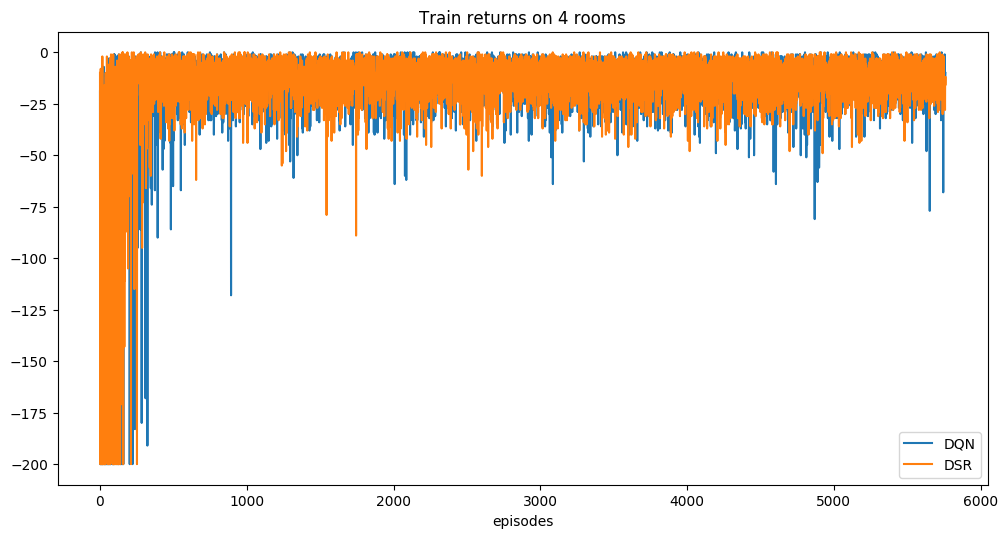

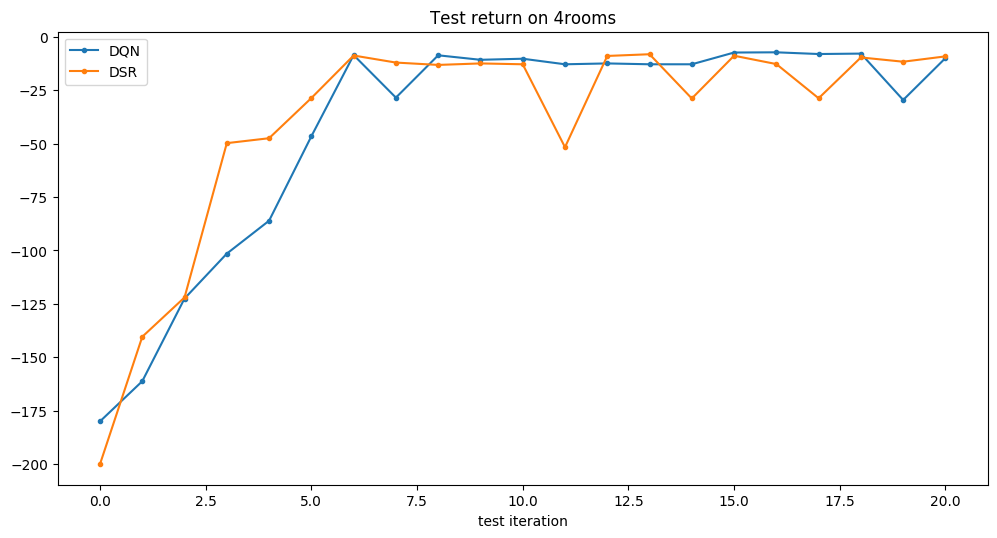

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6), dpi=100)
plt.plot(train_dqn[:train_max], label='DQN')
plt.plot(train_dsr[:train_max], label='DSR')
plt.title('Train returns on 4 rooms')
plt.xlabel('episodes'), plt.legend()
plt.show()

plt.figure(figsize=(12,6), dpi=100)
plt.plot(test_dqn[:test_max], '.-', label='DQN')
plt.plot(test_dsr[:test_max], '.-', label='DSR')
plt.title('Test return on 4rooms')
plt.xlabel('test iteration'), plt.legend()
plt.show()